# License

Copyright 2020 Hamaad Musharaf Shah

Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at

http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

# Using Bidirectional Generative Adversarial Networks to estimate Value-at-Risk for Market Risk Management
## Author: Hamaad Shah

---

We will explore the use of Bidirectional Generative Adversarial Networks (BiGAN) for market risk management: Estimation of portfolio risk measures such as Value-at-Risk (VaR). Generative Adversarial Networks (GAN) allow us to implicitly maximize the likelihood of complex distributions thereby allowing us to generate samples from such distributions - the key point here is the implicit maximum likelihood estimation principle whereby we do not specify what this complex distribution is parameterized as. Dealing with high dimensional data potentially coming from a complex distribution is a key aspect to market risk management among many other financial services use cases. GAN, specifically BiGAN for the purpose of this paper, will allow us to deal with potentially complex financial services data such that we do not have to explicitly specify a distribution such as a multidimensional Gaussian distribution.

## Market Risk Management: Value-at-Risk (VaR)

---

VaR is a measure of portfolio risk. For instance, a 1% VaR of -5% means that there is a 1% chance of earning a portfolio return of less than -5%. Think of it as a (lower) percentile or quantile of a portfolio returns distribution, i.e., we are concerned about the tail risk — the small chance of losing a remarkably large portfolio value. Such a large loss is funded by our own funds, i.e., capital which is an expensive source of funding compared to other peoples’ funds, i.e., debt. Therefore the estimation of VaR and similar market risk management measures inform banks and insurance firms with regards to the levels of capital they need to hold in order to have a buffer against unexpected downturns — market risk.

For our purpose, let us begin by fetching a data set of 5 stocks from Yahoo. The stocks are Apple, Google, Microsoft, Intel and Box. We use a daily frequency for our data for the year 2016. We use the stock's daily closing prices to compute the continuously compounded returns: $\log\left(\frac{V_{t+1}}{V_{t}}\right) = \log(V_{t+1}) - \log(V_{t})$.

![](../R/portfolio_returns.png)

Let's estimate the expected returns vector, volatilities vector, correlation and variance-covariance matrices. The variance-covariance matrix is recovered from the estimated volatilities vector and correlation matrix: $\Omega = C \odot \sigma \sigma^{T}$ where $\odot$ is the Hadamard product, $C \in \mathbb{R}^{5 \times 5}$ and $\sigma \in \mathbb{R}^{5 \times 1}$. Portfolio volatility is estimated as: $w^{T}\Omega w$ where $w \in \mathbb{R}^{5 \times 1}$

We consider the 3 major methods used in market risk management, specifically for the estimation of VaR. Please note that there are multiple different methods for estimating VaR and other more coherent risk measures such as Conditional Value-at-Risk (CVaR) however we are only considering the few major ones.

## VaR: Variance-covariance method

---

The first one is the variance-covariance method and uses the estimated portfolio volatility $w^{T}\Omega w$ under the Gaussian assumption to estimate VaR. Let's assume we are attempting to estimate 1% VaR: This means that there is a 1% probability of obtaining a portfolio return of less than the VaR value. Using the variance-covariance approach the calculation is: $\left[\left(w^{T}\Omega w\right) \mathcal{N}^{-1}(1\%)\right] + w^{T}\mu$, where $\mu \in \mathbb{R}^{5 \times 1}$ is the expected returns vector.

## VaR: Historical simulation method
The second method is a non-parametric approach where we sample with replacement from the historical data to estimate a portfolio returns distribution. The 1% VaR is simply the appropriate quantile from this sampled portfolio returns distribution.

## VaR: Monte Carlo method

---

The third method is Monte Carlo sampling from a multidimensional Gaussian distribution using the aforementioned $mu$ and $\Omega$ parameters. Finally the 1% VaR is simply the appropriate quantile from this sampled portfolio returns distribution.

## VaR: Estimates
The VaR estimates from the aforementioned 3 market risk management methods commonly used in banking are as follows:

| VaR Method    | 1% VaR | 
| :------------- |-------------:|
| Variance-covariance | -2.87% | 
| Historical simulation | -3.65%  |
| Monte Carlo simulation | -2.63%  |

## Bidirectional Generative Adversarial Network (BiGAN)

---

The 2 main components to a Generative Adversarial Network (GAN) are the generator and the discriminator. These 2 components play an adversarial game against each other. In doing so the generator learns how to create realistic synthetic samples from noise, i.e., the latent space $z$, while the discriminator learns how to distinguish between a real sample and a synthetic sample. See the following article of mine for a detailed explanation of GAN: https://goo.gl/ZWYngw

BiGAN extends GAN by adding a third component: The encoder, which learns to map from data space $x$ to the latent space $z$. The objective of the generator remains the same while the objective of the discriminator is altered to classify between a real sample and a synthetic sample and additionally between a real encoding, i.e., given by the encoder, and a synthetic encoding, i.e., a sample from the latent space $z$.

### Generator

---

Assume that we have a prior belief on where the latent space $z$ lies: $p_{Z}(z)$. Given a draw from this latent space the generator $G$, a deep learner parameterized by $\theta_{G}$, outputs a synthetic sample.

$$
G(z|\theta_{G}): z \rightarrow x_{synthetic}
$$ 

### Encoder

---

This can be shown to be an inverse of the generator. Given a draw from the data space the encoder $E$, a deep learner parameterized by $\theta_{E}$, outputs a real encoding.

$$
E(x|\theta_{E}): x \rightarrow z
$$ 

### Discriminator

---

The discriminator $D$ is a deep learner parameterized by $\theta_{D}$ and it aims to classify if a sample is real or synthetic, i.e., if a sample is from the real data distribution,

$$
p_{X}(x)
$$ 

or the synthetic data distribution.

$$
p_{G}(x|z)
$$

Additionally it aims to classify whether an encoding is real,

$$
p_{E}(z|x)
$$

or synthetic.

$$
p_{Z}(z) 
$$

Let us denote the discriminator $D$ as follows.

$$
D(\{x, z\}|\theta_{D}): \{x, z\} \rightarrow [0, 1]
$$ 

We assume that the positive examples are real, i.e., $\{x, E(x|\theta_{E})\}$ while the negative examples are synthetic, i.e., $\{G(z|\theta_{G}), z\}$. 

### Optimal discriminator, encoder and generator

---

The BiGAN has the following objective function, similar to the GAN.

$$
\min_{G(z|\theta_{G}), E(x|\theta_{E})} \max_{D(\{x, z\}|\theta_{D})} V(D(\{x, z\}|\theta_{D}), G(z|\theta_{G}), E(x|\theta_{E}))
$$

\begin{align*}
V(D(\{x, z\}|\theta_{D}), G(z|\theta_{G}), E(x|\theta_{E})) &= \mathbb{E}_{x \sim p_{X}(x)} \mathbb{E}_{z \sim p_{E}(z|x)} \log\left[{D(\{x, z\}|\theta_{D})}\right] + \mathbb{E}_{z \sim p_{Z}(z)} \mathbb{E}_{x \sim p_{G}(x|z)} \log\left[{1-D(\{x, z\}|\theta_{D})}\right] \\
&= \int_{x} p_{X}(x) \int_{z} p_{E}(z|x) \log\left[{D(\{x, z\}|\theta_{D})}\right] dz dx + \int_{z} p_{Z}(z) \int_{x} p_{G}(x|z) \log\left[{1 - D(\{x, z\}|\theta_{D})}\right] dx dz \\
&= \int_{\{x, z\}} p_{X}(x) p_{E}(z|x) \log\left[{D(\{x, z\}|\theta_{D})}\right] d\{x, z\} + \int_{\{x, z\}} p_{Z}(z) p_{G}(x|z) \log\left[{1 - D(\{x, z\}|\theta_{D})}\right] d\{x, z\} \\
&= \int_{\omega:=\{x, z\}} \underbrace{p_{EX}(\omega) \log\left[{D(\omega|\theta_{D})}\right] + p_{GZ}(\omega) \log\left[{1 - D(\omega|\theta_{D})}\right]}_{J(D(\omega|\theta_{D}))} d\omega \\
\end{align*}

Let us take a closer look at the discriminator's objective function for a sample $\omega$.

\begin{align*}
J(D(\omega|\theta_{D})) &= p_{EX}(\omega) \log{D(\omega|\theta_{D})} + p_{GZ}(\omega) \log{(1 - D(\omega|\theta_{D}))} \\
\frac{\partial J(D(\omega|\theta_{D}))}{\partial D(\omega|\theta_{D})} &= \frac{p_{EX}(\omega)}{D(\omega|\theta_{D})} - \frac{p_{GZ}(\omega)}{(1 - D(\omega|\theta_{D}))} \\
0 &= \frac{p_{EX}(\omega)}{D^\ast(\omega|\theta_{D^\ast})} - \frac{p_{GZ}(\omega)}{(1 - D^\ast(\omega|\theta_{D^\ast}))} \\
p_{EX}(\omega)(1 - D^\ast(\omega|\theta_{D^\ast})) &= p_{GZ}(\omega)D^\ast(\omega|\theta_{D^\ast}) \\
p_{EX}(\omega) - p_{EX}(\omega)D^\ast(\omega|\theta_{D^\ast})) &= p_{GZ}(\omega)D^\ast(\omega|\theta_{D^\ast}) \\
p_{GZ}(\omega)D^\ast(\omega|\theta_{D^\ast}) + p_{EX}(\omega)D^\ast(\omega|\theta_{D^\ast})) &= p_{EX}(\omega) \\
D^\ast(\omega|\theta_{D^\ast}) &= \frac{p_{EX}(\omega)}{p_{EX}(\omega) + p_{GZ}(\omega)} 
\end{align*}

We have found the optimal discriminator given a generator and an encoder. Let us focus now on the generator and encoder's objective function which is essentially to minimize the discriminator's objective function.

\begin{align*}
J(G(z|\theta_{G}), E(x|\theta_{E})) &= \mathbb{E}_{\omega \sim p_{EX}(\omega)} \log{D^\ast(\omega|\theta_{D^\ast})} + \mathbb{E}_{\omega \sim p_{GZ}(\omega)} \log{(1 - D^\ast(\omega|\theta_{D^\ast}))} \\
&= \mathbb{E}_{\omega \sim p_{EX}(\omega)} \log{\bigg( \frac{p_{EX}(\omega)}{p_{EX}(\omega) + p_{GZ}(\omega)}} \bigg) + \mathbb{E}_{\omega \sim p_{GZ}(\omega)} \log{\bigg(1 - \frac{p_{EX}(\omega)}{p_{EX}(\omega) + p_{GZ}(\omega)}\bigg)} \\
&= \mathbb{E}_{\omega \sim p_{EX}(\omega)} \log{\bigg( \frac{p_{EX}(\omega)}{p_{EX}(\omega) + p_{GZ}(\omega)}} \bigg) + \mathbb{E}_{\omega \sim p_{GZ}(\omega)} \log{\bigg(\frac{p_{GZ}(\omega)}{p_{EX}(\omega) + p_{GZ}(\omega)}\bigg)} \\
&= \int_{\omega} p_{EX}(\omega) \log{\bigg( \frac{p_{EX}(\omega)}{p_{EX}(\omega) + p_{GZ}(\omega)}} \bigg) d\omega + \int_{\omega} p_{GZ}(\omega) \log{\bigg(\frac{p_{GZ}(\omega)}{p_{EX}(\omega) + p_{GZ}(\omega)}\bigg)} d\omega
\end{align*}

We will note the Kullback–Leibler (KL) divergences in the above objective function for the generator and encoder.

$$
D_{KL}(P||Q) = \int_{x} p(x) \log\bigg(\frac{p(x)}{q(x)}\bigg) dx
$$

Recall the definition of a $\lambda$ divergence.

$$
D_{\lambda}(P||Q) = \lambda D_{KL}(P||\lambda P + (1 - \lambda) Q) + (1 - \lambda) D_{KL}(Q||\lambda P + (1 - \lambda) Q)
$$

If $\lambda$ takes the value of 0.5 this is then called the Jensen-Shannon (JS) divergence. This divergence is symmetric and non-negative.

$$
D_{JS}(P||Q) = 0.5 D_{KL}\bigg(P\bigg|\bigg|\frac{P + Q}{2}\bigg) + 0.5 D_{KL}\bigg(Q\bigg|\bigg|\frac{P + Q}{2}\bigg)
$$

Keeping this in mind let us take a look again at the objective function of the generator and the encoder.

\begin{align*}
J(G(z|\theta_{G}), E(x|\theta_{E})) &= \int_{\omega} p_{EX}(\omega) \log{\bigg( \frac{p_{EX}(\omega)}{p_{EX}(\omega) + p_{GZ}(\omega)}} \bigg) d\omega + \int_{\omega} p_{GZ}(\omega) \log{\bigg(\frac{p_{GZ}(\omega)}{p_{EX}(\omega) + p_{GZ}(\omega)}\bigg)} d\omega \\
&= \int_{\omega} p_{EX}(\omega) \log{\bigg(\frac{2}{2}\frac{p_{EX}(\omega)}{p_{EX}(\omega) + p_{GZ}(\omega)}} \bigg) d\omega + \int_{\omega} p_{GZ}(\omega) \log{\bigg(\frac{2}{2}\frac{p_{GZ}(\omega)}{p_{EX}(\omega) + p_{GZ}(\omega)}\bigg)} d\omega \\
&= \int_{\omega} p_{EX}(\omega) \log{\bigg(\frac{1}{2}\frac{1}{0.5}\frac{p_{EX}(\omega)}{p_{EX}(\omega) + p_{GZ}(\omega)}} \bigg) d\omega + \int_{\omega} p_{GZ}(\omega) \log{\bigg(\frac{1}{2}\frac{1}{0.5}\frac{p_{GZ}(\omega)}{p_{EX}(\omega) + p_{GZ}(\omega)}\bigg)} d\omega \\
&= \int_{\omega} p_{EX}(\omega) \bigg[ \log(0.5) + \log{\bigg(\frac{p_{EX}(\omega)}{0.5 (p_{EX}(\omega) + p_{GZ}(\omega))}} \bigg) \bigg] d\omega \\ &+ \int_{\omega} p_{GZ}(\omega) \bigg[\log(0.5) + \log{\bigg(\frac{p_{GZ}(\omega)}{0.5 (p_{EX}(\omega) + p_{GZ}(\omega))}\bigg) \bigg] } d\omega \\
&= \log\bigg(\frac{1}{4}\bigg) + \int_{\omega} p_{EX}(\omega) \bigg[\log{\bigg(\frac{p_{EX}(\omega)}{0.5 (p_{EX}(\omega) + p_{GZ}(\omega))}} \bigg) \bigg] d\omega \\ 
&+ \int_{\omega} p_{GZ}(\omega) \bigg[\log{\bigg(\frac{p_{GZ}(\omega)}{0.5 (p_{EX}(\omega) + p_{GZ}(\omega))}\bigg) \bigg] } d\omega \\
&= -\log(4) + D_{KL}\bigg(P_{EX}\bigg|\bigg|\frac{P_{EX} + P_{GZ}}{2}\bigg) + D_{KL}\bigg(P_{GZ}\bigg|\bigg|\frac{P_{EX} + P_{GZ}}{2}\bigg) \\
&= -\log(4) + 2 \bigg(0.5 D_{KL}\bigg(P_{EX}\bigg|\bigg|\frac{P_{EX} + P_{GZ}}{2}\bigg) + 0.5 D_{KL}\bigg(P_{GZ}\bigg|\bigg|\frac{P_{EX} + P_{GZ}}{2}\bigg)\bigg) \\
&= -\log(4) + 2D_{JS}(P_{EX}||P_{GZ}) 
\end{align*}

It is clear from the objective function of the generator and encoder above that the global minimum value attained is $-\log(4)$ which occurs when the following holds.

$$
P_{EX}=P_{GZ}
$$

When the above holds the Jensen-Shannon divergence, i.e., $D_{JS}(P_{EX}||P_{GZ})$, will be zero. Hence we have shown that the optimal solution is as follows.

$$
P_{EX}=P_{GZ}
$$

Given the above result we can prove that the optimal discriminator will be $\frac{1}{2}$.

\begin{align*}
D^\ast(\omega|\theta_{D^\ast}) &= \frac{p_{EX}(\omega)}{p_{EX}(\omega) + p_{GZ}(\omega)} \\
 &= \frac{p_{EX}(\omega)}{p_{EX}(\omega) + p_{EX}(\omega)} \\
 &= \frac{p_{EX}(\omega)}{2p_{EX}(\omega)} \\
 &= \frac{1}{2} \\
\end{align*}

### Optimal encoder and generator are inverse functions of each other

---

At the optimal generator and encoder we can show that the generator and encoder are inverse functions of each other. Recall from earlier the definitions of the generator and the encoder.

$$
G(z|\theta_{G}): z \rightarrow x_{synthetic}
$$ 

$$
E(x|\theta_{E}): x \rightarrow z
$$ 

At this point the optimal discriminator is $\frac{1}{2}$, i.e., the discriminator cannot effectively differentiate between real and synthetic data as the synthetic data is realistic. Remember that at this point the likelihood would have been implicitly maximized such that any samples taken from the synthetic distribution should be similar to those taken from the real distribution. In short, if optimality of the generator, encoder and discriminator holds then the synthetic data should look similar, or rather be the same, as the real data. Keeping this important point in mind let's slightly re-write the optimal generator and encoder functions.

$$
G^\ast(z|\theta_{G^\ast}): z \rightarrow x
$$ 

$$
E^\ast(x|\theta_{E^\ast}): x \rightarrow z
$$ 

Recall further that the following holds at the optimal generator and encoder.

\begin{align*}
P_{EX} &= \int_{x} p_{X}(x) \int_{z=E^\ast(x|\theta_{E^\ast})} p_{E^\ast}(z|x) dz dx \\
\end{align*}

In the above please note the following; note also that we make the assumption that the generator is not an inverse function of the encoder for providing a proof by contradiction.

\begin{align*}
z&=E^\ast(x|\theta_{E^\ast}) \\
x&\neq G^\ast(E^\ast(x|\theta_{E^\ast})|\theta_{G^\ast}) \\
\end{align*}

Recall that optimality condition of the generator and encoder.

\begin{align*}
P_{EX} &= P_{GZ} \\
P_{GZ} &= \int_{z} p_{Z}(z) \int_{x=G^\ast(z|\theta_{G^\ast})} p_{G^\ast}(x|z) dx dz \\
\end{align*}

In the above please note the following.

\begin{align*}
x&=G^\ast(z|\theta_{G^\ast}) \\
z&=E^\ast(x|\theta_{E^\ast}) \\
z&=E^\ast(G^\ast(z|\theta_{G^\ast})|\theta_{E^\ast}) \\
G^\ast(z|\theta_{G^\ast})&=G^\ast(E^\ast(G^\ast(z|\theta_{G^\ast})|\theta_{E^\ast})|\theta_{G^\ast}) \\
\end{align*}

If optimality holds then the following holds as shown above.

$$
G^\ast(z|\theta_{G^\ast})=G^\ast(E^\ast(G^\ast(z|\theta_{G^\ast})|\theta_{E^\ast})|\theta_{G^\ast})
$$

However since we assumed that the generator is not an inverse function of the encoder then the above conditions cannot hold thereby violating the optimality condition.

\begin{align*}
x&\neq G^\ast(E^\ast(x|\theta_{E^\ast})|\theta_{G^\ast}) \\
G^\ast(z|\theta_{G^\ast})&\neq G^\ast(E^\ast(G^\ast(z|\theta_{G^\ast})|\theta_{E^\ast})|\theta_{G^\ast}) \\
\end{align*}

Therefore we have shown by contradiction that under optimality of the generator and encoder the generator is an inverse function of the encoder.

\begin{align*}
x&=G^\ast(E^\ast(x|\theta_{E^\ast})|\theta_{G^\ast}) \\
\end{align*}

The same arguments made above can be shown for the encoder being the inverse of the generator.

\begin{align*}
P_{GZ} &= \int_{z} p_{Z}(z) \int_{x=G^\ast(z|\theta_{G^\ast})} p_{G^\ast}(x|z) dx dz \\
\end{align*}

In the above please note the following; note also that we make the assumption that the encoder is not an inverse function of the generator for providing a proof by contradiction.

\begin{align*}
x&=G^\ast(z|\theta_{G^\ast}) \\
z&\neq E^\ast(G^\ast(z|\theta_{G^\ast})|\theta_{E^\ast}) \\
\end{align*}

Recall that optimality condition of the generator and encoder.

\begin{align*}
P_{EX} &= P_{GZ} \\
P_{EX} &= \int_{x} p_{X}(x) \int_{z=E^\ast(x|\theta_{E^\ast})} p_{E^\ast}(z|x) dz dx \\
\end{align*}

In the above please note the following.

\begin{align*}
z&=E^\ast(x|\theta_{E^\ast}) \\
x&=G^\ast(z|\theta_{G^\ast}) \\
x&=G^\ast(E^\ast(x|\theta_{E^\ast})|\theta_{G^\ast}) \\
E^\ast(x|\theta_{E^\ast})&=E^\ast(G^\ast(E^\ast(x|\theta_{E^\ast})|\theta_{G^\ast})|\theta_{E^\ast}) \\
\end{align*}

If optimality holds then the following holds as shown above.

$$
E^\ast(x|\theta_{E^\ast})=E^\ast(G^\ast(E^\ast(x|\theta_{E^\ast})|\theta_{G^\ast})|\theta_{E^\ast})
$$

However since we assumed that the encoder is not an inverse function of the generator then the above conditions cannot hold thereby violating the optimality condition.

\begin{align*}
z&\neq E^\ast(G^\ast(z|\theta_{G^\ast})|\theta_{E^\ast}) \\
E^\ast(x|\theta_{E^\ast})&\neq E^\ast(G^\ast(E^\ast(x|\theta_{E^\ast})|\theta_{G^\ast})|\theta_{E^\ast}) \\
\end{align*}

Therefore we have shown by contradiction that under optimality of the generator and encoder the encoder is an inverse function of the generator.

\begin{align*}
z&= E^\ast(G^\ast(z|\theta_{G^\ast})|\theta_{E^\ast}) \\
\end{align*}

Therefore we have shown that the optimal encoder and generator are inverse functions of each other via proof by contradiction: If they were not inverse functions of each other then it would violate the optimality condition for the encoder and generator, i.e.,  $P_{EX} = P_{GZ}$.

### BiGAN relation to autoencoders

At this point it might be a good idea to review my previous article on autoencoders here: https://goo.gl/qWqbbv

Note that given an optimal discriminator, the objective function of the generator and encoder can be thought of as that of an autoencoder, where the generator plays the role of a decoder. The objective function of the generator and encoder is simply to minimize the objective function of the discriminator, i.e., we have not explicitly specified the structure of the reconstruction loss as one might do so with an autoencoder. This implicit minimization of the reconstruction loss is yet another great advantage of BiGAN: One does not need to explicitly define a reconstruction loss. 

Let's remind ourselves of the objective function of the generator and encoder.

\begin{align*}
J(G(z|\theta_{G}), E(x|\theta_{E})) &= -\log(4) + 2D_{JS}(P_{EX}||P_{GZ}) \\
&= -\log(4) + 2 \bigg(0.5 D_{KL}\bigg(P_{EX}\bigg|\bigg|\frac{P_{EX} + P_{GZ}}{2}\bigg) + 0.5 D_{KL}\bigg(P_{GZ}\bigg|\bigg|\frac{P_{EX} + P_{GZ}}{2}\bigg)\bigg) \\
&= -\log(4) + D_{KL}\bigg(P_{EX}\bigg|\bigg|\frac{P_{EX} + P_{GZ}}{2}\bigg) + D_{KL}\bigg(P_{GZ}\bigg|\bigg|\frac{P_{EX} + P_{GZ}}{2}\bigg) \\
&= \log\bigg(\frac{1}{4}\bigg) + \int_{\omega} p_{EX}(\omega) \bigg[\log{\bigg(\frac{p_{EX}(\omega)}{0.5 (p_{EX}(\omega) + p_{GZ}(\omega))}} \bigg) \bigg] d\omega \\ 
&+ \int_{\omega} p_{GZ}(\omega) \bigg[\log{\bigg(\frac{p_{GZ}(\omega)}{0.5 (p_{EX}(\omega) + p_{GZ}(\omega))}\bigg) \bigg] } d\omega \\
\end{align*}

Let's deal with $F_{EG}$ first and then with $F_{GE}$ second in a similar manner. These are defined as follows.

\begin{align*}
D_{KL}\bigg(P_{EX}\bigg|\bigg|\frac{P_{EX} + P_{GZ}}{2}\bigg) &= \underbrace{\log{2}}_{\text{We can omit this constant for simplicity}} + \int_{\omega} p_{EX}(\omega) \bigg[\log{\bigg(\frac{p_{EX}(\omega)}{(p_{EX}(\omega) + p_{GZ}(\omega))}} \bigg) \bigg] d\omega \\
D_{KL}\bigg(P_{EX}\bigg|\bigg|\frac{P_{EX} + P_{GZ}}{2}\bigg) - \log{2} &= \int_{\omega} \bigg[\log{\bigg(\frac{p_{EX}(\omega)d\omega}{\left[\underbrace{(p_{EX}(\omega) + p_{GZ}(\omega))d\omega}_{d(P_{EX} + P_{GZ})}\right]}} \bigg) \bigg] \underbrace{p_{EX}(\omega) d\omega}_{dP_{EX}} \\
F_{EG} &= \int \bigg[\log{\underbrace{\bigg(\frac{dP_{EX}}{d(P_{EX} + P_{GZ})}\bigg)}_{\text{Radon-Nikodym derivative: }f_{EG}}} \bigg] dP_{EX} \\
F_{EG} &= \int \log{f_{EG}} dP_{EX} \\
\end{align*}

Briefly recall the definition of a Radon-Nikodym derivative: $\frac{d\nu}{d\mu}$.

$$
\nu = \int \frac{d\nu}{d\mu}d\mu
$$

It follows then.

\begin{align*}
P_{EX}(X) &= \int_{X} \frac{dP_{EX}}{d(P_{EX} + P_{GZ})} d(P_{EX} + P_{GZ}) \\
\end{align*}

Now for the second term: $F_{GE}$.

\begin{align*}
D_{KL}\bigg(P_{GZ}\bigg|\bigg|\frac{P_{EX} + P_{GZ}}{2}\bigg) &= \underbrace{\log{2}}_{\text{We can omit this constant for simplicity}} + \int_{\omega} p_{GZ}(\omega) \bigg[\log{\bigg(\frac{p_{GZ}(\omega)}{(p_{EX}(\omega) + p_{GZ}(\omega))}} \bigg) \bigg] d\omega \\
D_{KL}\bigg(P_{GZ}\bigg|\bigg|\frac{P_{EX} + P_{GZ}}{2}\bigg) - \log{2} &= \int_{\omega} \bigg[\log{\bigg(\frac{p_{GZ}(\omega)d\omega}{\left[\underbrace{(p_{EX}(\omega) + p_{GZ}(\omega))d\omega}_{d(P_{EX} + P_{GZ})}\right]}} \bigg) \bigg] \underbrace{p_{GZ}(\omega) d\omega}_{dP_{GZ}} \\
F_{GE} &= \int \bigg[\log{\underbrace{\bigg(\frac{dP_{GZ}}{d(P_{EX} + P_{GZ})}\bigg)}_{\text{Radon-Nikodym derivative: }f_{GE}}} \bigg] dP_{GZ} \\
F_{GE} &= \int \log{f_{GE}} dP_{GZ} \\
\end{align*}

It follows then.

\begin{align*}
P_{GZ}(X) &= \int_{X} \frac{dP_{GZ}}{d(P_{EX} + P_{GZ})} d(P_{EX} + P_{GZ}) \\
\end{align*}

Note also that.

\begin{align*}
f_{EG} + f_{GE} &= \frac{dP_{EX}}{d(P_{EX} + P_{GZ})} + \frac{dP_{GZ}}{d(P_{EX} + P_{GZ})} \\
&= \frac{dP_{EX} + dP_{GZ}}{d(P_{EX} + P_{GZ})} \\
&= \frac{dP_{EX} + dP_{GZ}}{dP_{EX} + dP_{GZ}} \\
&= 1 \\
\end{align*}

Now we shall prove that $f_{EG} > 0$ with $P_{EX}$ almost everywhere. To prove this, assume that $f_{EG} = 0$.

\begin{align*}
P_{EX}(X) &= \int_{X} f_{EG} d(P_{EX} + P_{GZ}) \\
P_{EX}(X) &= \int_{X} 0 d(P_{EX} + P_{GZ}) \\
P_{EX}(X) &= 0 \\
\end{align*}

Therefore, $f_{EG} > 0$ with $P_{EX}$ almost everywhere. This means that $F_{EG}$ is well defined.

Now we shall prove that $f_{GE} > 0$ with $P_{GZ}$ almost everywhere. To prove this, assume that $f_{GE} = 0$.

\begin{align*}
P_{GZ}(X) &= \int_{X} f_{GE} d(P_{EX} + P_{GZ}) \\
P_{GZ}(X) &= \int_{X} 0 d(P_{EX} + P_{GZ}) \\
P_{GZ}(X) &= 0 \\
\end{align*}

Therefore, $f_{GE} > 0$ with $P_{GZ}$ almost everywhere. This means that $F_{GE}$ is well defined.

The $F_{EG}$ outside the support of $P_{GZ}$ is $0$. Similarly, the $F_{GE}$ outside the support of $P_{EX}$ is $0$. We start with the former.

\begin{align*}
P_{EX}(\{X\backslash\text{supp}(P_{GZ}) | f_{EG} < 1\}) &= \int_{\{X\backslash\text{supp}(P_{GZ}) | f_{EG} < 1\}} f_{EG} d(P_{EX} + P_{GZ}) \\
&= \int_{\{X\backslash\text{supp}(P_{GZ}) | f_{EG} < 1\}} f_{EG} dP_{EX} + \int_{\{X\backslash\text{supp}(P_{GZ}) | f_{EG} < 1\}} f_{EG} dP_{GZ} \\
\end{align*}

Note that because of $\{X\backslash\text{supp}(P_{GZ}) | f_{EG} < 1\}$ this implies $dP_{GZ}=p_{GZ}d\omega=0$.

\begin{align*}
P_{EX}(\{X\backslash\text{supp}(P_{GZ}) | f_{EG} < 1\}) &= \int_{\{X\backslash\text{supp}(P_{GZ}) | f_{EG} < 1\}} f_{EG} dP_{EX} + \underbrace{\int_{\{X\backslash\text{supp}(P_{GZ}) | f_{EG} < 1\}} f_{EG} dP_{GZ}}_{\text{This term is } 0 \text{ due to the aforementioned note}} \\
&\leq \underbrace{\epsilon}_{f_{EG} \leq \epsilon < 1} P_{EX}(\{X\backslash\text{supp}(P_{GZ}) | f_{EG} < 1\}) \\
&< P_{EX}(\{X\backslash\text{supp}(P_{GZ}) | f_{EG} < 1\}) \\
\end{align*}

Note that in the above proof $\epsilon$ is simply a term that is at least as large or larger than $f_{EG}$ while being smaller than $1$. Assuming this holds we clearly show that $P_{EX}(\{X\text{\supp}(P_{GZ}) | f_{EG} < 1\}) < P_{EX}(\{X\text{\supp}(P_{GZ}) | f_{EG} < 1\})$ which is a contradiction. Hence, $P_{EX}(\{X\backslash\text{supp}(P_{GZ}) | f_{EG} < 1\}) = 0$ and $f_{EG}=1$ almost everywhere in $X\backslash\text{supp}(P_{GZ})$. This implies that $\log{f_{EG}}=0 \text{, } P_{EX}$ almost everywhere in $X\backslash\text{supp}(P_{GZ})$. Hence $F_{EG}$ in the support $X\backslash\text{supp}(P_{GZ})$ is $0$, i.e., $F_{EG}$ outside the support of $P_{GZ}$ is $0$.

The $F_{GE}$ outside the support of $P_{EX}$ is $0$.

\begin{align*}
P_{GZ}(\{X\backslash\text{supp}(P_{EX}) | f_{GE} < 1\}) &= \int_{\{X\backslash\text{supp}(P_{EX}) | f_{GE} < 1\}} f_{GE} d(P_{EX} + P_{GZ}) \\
&= \int_{\{X\backslash\text{supp}(P_{EX}) | f_{GE} < 1\}} f_{GE} dP_{GZ} + \int_{\{X\backslash\text{supp}(P_{EX}) | f_{GE} < 1\}} f_{GE} dP_{EX} \\
\end{align*}

Note that because of $\{X\backslash\text{supp}(P_{EX}) | f_{GE} < 1\}$ this implies $dP_{EX}=p_{EX}d\omega=0$.

\begin{align*}
P_{GZ}(\{X\backslash\text{supp}(P_{EX}) | f_{GE} < 1\}) &= \int_{\{X\backslash\text{supp}(P_{EX}) | f_{GE} < 1\}} f_{GE} dP_{GZ} + \underbrace{\int_{\{X\backslash\text{supp}(P_{EX}) | f_{GE} < 1\}} f_{GE} dP_{EX}}_{\text{This term is } 0 \text{ due to the aforementioned note}} \\
&\leq \underbrace{\epsilon}_{f_{GE} \leq \epsilon < 1} P_{GZ}(\{X\backslash\text{supp}(P_{EX}) | f_{GE} < 1\}) \\
&< P_{GZ}(\{X\backslash\text{supp}(P_{EX}) | f_{GE} < 1\}) \\
\end{align*}

Note that in the above proof $\epsilon$ is simply a term that is at least as large or larger than $f_{GE}$ while being smaller than $1$. Assuming this holds we clearly show that $P_{GZ}(\{X\backslash\text{supp}(P_{EX}) | f_{GE} < 1\}) < P_{GZ}(\{X\backslash\text{supp}(P_{EX}) | f_{GE} < 1\})$ which is a contradiction. Hence, $P_{GZ}(\{X\backslash\text{supp}(P_{EX}) | f_{GE} < 1\}) = 0$ and $f_{GE}=1$ almost everywhere in $X\backslash\text{supp}(P_{EX})$. This implies that $\log{f_{GE}}=0 \text{, } P_{GZ}$ almost everywhere in $X\backslash\text{supp}(P_{EX})$. Hence $F_{GE}$ in the support $X\backslash\text{supp}(P_{EX})$ is $0$, i.e., $F_{GE}$ outside the support of $P_{EX}$ is $0$.

Therefore the aforementioned KL divergences are most likely non-zero in $\text{supp}(P_{EX})\cap\text{supp}(P_{GZ})$. In this space we show that $f_{EG}<1$, $P_{EX}$ almost everywhere and $f_{GE}<1$, $P_{GZ}$ almost everywhere.

Lets assume that in the region $\text{supp}(P_{EX})\cap\text{supp}(P_{GZ})$, $f_{EG}=1$ and that this set $\{\text{supp}(P_{EX})\cap\text{supp}(P_{GZ}) | f_{EG}=1\}$ is not empty. This implies that $P_{EX}(\{\text{supp}(P_{EX})\cap\text{supp}(P_{GZ}) | f_{EG}=1\})>0$ and $P_{GZ}(\{\text{supp}(P_{EX})\cap\text{supp}(P_{GZ}) | f_{EG}=1\})>0$. Therefore the following holds.

\begin{align*}
P_{EX}(\{\text{supp}(P_{EX})\cap\text{supp}(P_{GZ}) | f_{EG}=1\}) &= \int_{\{\text{supp}(P_{EX})\cap\text{supp}(P_{GZ}) | f_{EG}=1\}} f_{EG} d(P_{EX} + P_{GZ}) \\
P_{EX}(\{\text{supp}(P_{EX})\cap\text{supp}(P_{GZ}) | f_{EG}=1\}) &= \int_{\{\text{supp}(P_{EX})\cap\text{supp}(P_{GZ}) | f_{EG}=1\}} 1 d(P_{EX} + P_{GZ}) \\
P_{EX}(\{\text{supp}(P_{EX})\cap\text{supp}(P_{GZ}) | f_{EG}=1\}) &= P_{EX}(\{\text{supp}(P_{EX})\cap\text{supp}(P_{GZ}) | f_{EG}=1\}) + P_{GZ}(\{\text{supp}(P_{EX})\cap\text{supp}(P_{GZ}) | f_{EG}=1\}) \\
\end{align*}

Clearly the above implies that $P_{GZ}(\{\text{supp}(P_{EX})\cap\text{supp}(P_{GZ}) | f_{EG}=1\})=0$ and contradicts the earlier definition of support, i.e., $P_{GZ}(\{\text{supp}(P_{EX})\cap\text{supp}(P_{GZ}) | f_{EG}=1\})>0$. Hence $\{\text{supp}(P_{EX})\cap\text{supp}(P_{GZ}) | f_{EG}=1\}$ is an empty set and hence $f_{EG}<1$, $P_{EX}$ almost everywhere on $\text{supp}(P_{EX})\cap\text{supp}(P_{GZ})$. Note finally that this implies that $\log{f_{EG}}<0$, $P_{EX}$ almost everywhere.

Lets assume that in the region $\text{supp}(P_{EX})\cap\text{supp}(P_{GZ})$, $f_{GE}=1$ and that this set $\{\text{supp}(P_{EX})\cap\text{supp}(P_{GZ}) | f_{GE}=1\}$ is not empty. This implies that $P_{GZ}(\{\text{supp}(P_{EX})\cap\text{supp}(P_{GZ}) | f_{GE}=1\})>0$ and $P_{EX}(\{\text{supp}(P_{EX})\cap\text{supp}(P_{GZ}) | f_{GE}=1\})>0$. Therefore the following holds.

\begin{align*}
P_{GZ}(\{\text{supp}(P_{EX})\cap\text{supp}(P_{GZ}) | f_{GE}=1\}) &= \int_{\{\text{supp}(P_{EX})\cap\text{supp}(P_{GZ}) | f_{GE}=1\}} f_{GE} d(P_{EX} + P_{GZ}) \\
P_{GZ}(\{\text{supp}(P_{EX})\cap\text{supp}(P_{GZ}) | f_{GE}=1\}) &= \int_{\{\text{supp}(P_{EX})\cap\text{supp}(P_{GZ}) | f_{GE}=1\}} 1 d(P_{EX} + P_{GZ}) \\
P_{GZ}(\{\text{supp}(P_{EX})\cap\text{supp}(P_{GZ}) | f_{GE}=1\}) &= P_{EX}(\{\text{supp}(P_{EX})\cap\text{supp}(P_{GZ}) | f_{GE}=1\}) + P_{GZ}(\{\text{supp}(P_{EX})\cap\text{supp}(P_{GZ}) | f_{GE}=1\}) \\
\end{align*}

Clearly the above implies that $P_{EX}(\{\text{supp}(P_{EX})\cap\text{supp}(P_{GZ}) | f_{GE}=1\})=0$ and contradicts the earlier definition of support, i.e., $P_{EX}(\{\text{supp}(P_{EX})\cap\text{supp}(P_{GZ}) | f_{GE}=1\})>0$. Hence $\{\text{supp}(P_{EX})\cap\text{supp}(P_{GZ}) | f_{GE}=1\}$ is an empty set and hence $f_{GE}<1$, $P_{GZ}$ almost everywhere on $\text{supp}(P_{EX})\cap\text{supp}(P_{GZ})$. Note finally that this implies that $\log{f_{GE}}<0$, $P_{GZ}$ almost everywhere.

We have clearly shown that $F_{EG}(X\backslash\text{supp}(P_{GZ}))=0$ and $F_{GE}(X\backslash\text{supp}(P_{EX}))=0$. This implies that $\text{supp}(P_{EX})\cap\text{supp}(P_{GZ})$ is the only region where $F_{EG}$ and $F_{GE}$ might be non-zero.

Therefore.

\begin{align*}
F_{EG} &= \int_{\text{supp}(P_{EX})\cap\text{supp}(P_{GZ})} \log{f_{EG}} dP_{EX} \\
F_{GE} &= \int_{\text{supp}(P_{EX})\cap\text{supp}(P_{GZ})} \log{f_{GE}} dP_{GZ} \\
\end{align*}

\begin{align*}
J(G(z|\theta_{G}), E(x|\theta_{E})) &= F_{EG} + F_{GE} \\
&= \int_{\text{supp}(P_{EX})\cap\text{supp}(P_{GZ})} \log{f_{EG}} dP_{EX} + \int_{\text{supp}(P_{EX})\cap\text{supp}(P_{GZ})} \log{f_{GE}} dP_{GZ} \\
&= \underbrace{\int_{\text{supp}(P_{EX})\cap\text{supp}(P_{GZ})} \log{f_{EG}} dP_{EX} + \int_{\text{supp}(P_{EX})\cap\text{supp}(P_{GZ})} \log{(1 - f_{EG})} dP_{GZ}}_{\text{Note that this is an autoencoder type reconstruction loss function: We find an encoder and generator such that it minimizes this function given an optimal discriminator}} \\
&= D_{KL}\bigg(P_{EX}\bigg|\bigg|\frac{P_{EX} + P_{GZ}}{2}\bigg) - \log{2} + D_{KL}\bigg(P_{GZ}\bigg|\bigg|\frac{P_{EX} + P_{GZ}}{2}\bigg) - \log{2} \\
&= D_{KL}\bigg(P_{EX}\bigg|\bigg|\frac{P_{EX} + P_{GZ}}{2}\bigg) + D_{KL}\bigg(P_{GZ}\bigg|\bigg|\frac{P_{EX} + P_{GZ}}{2}\bigg) - \log{4} 
\end{align*}

We have clearly shown that $f_{EG} \in (0, 1)$, $P_{EX}$ almost everywhere in $\text{supp}(P_{EX})\cap\text{supp}(P_{GZ})$. Therefore, $\log{f_{EG}} \in (-\inf, 0)$, $P_{EX}$ almost everywhere.

We have clearly shown that $f_{GE} \in (0, 1)$, $P_{GZ}$ almost everywhere in $\text{supp}(P_{EX})\cap\text{supp}(P_{GZ})$. Therefore, $\log{f_{GE}} \in (-\inf, 0)$, $P_{GZ}$ almost everywhere.

In the extensive proof above we have shown the relationship of the BiGAN with autoencoders. The BiGAN can be a useful for representation learning or automatic feature engineering.

At this point we have defined the BiGAN and now we shall implement it and use it for our particular use case as mentioned earlier.

In [1]:
import inspect

import numpy as np

np.set_printoptions(suppress=True)

import pandas as pd

import tensorflow as tf

gpu_devices = tf.config.list_physical_devices(device_type="GPU")
tf.config.experimental.set_memory_growth(device=gpu_devices[0], enable=True)
tf.keras.backend.set_floatx(value="float64")
tf.config.run_functions_eagerly(run_eagerly=True)

from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from scipy.stats import norm

import matplotlib.pyplot as plt

%matplotlib inline
from PIL import Image
import plotnine

print("TensorFlow version:", tf.__version__)
print("GPU:", gpu_devices)

ret_data = pd.read_csv(filepath_or_buffer="../R/ret_data.csv")
mean = ret_data.apply(func=np.mean, axis=0)
std = ret_data.apply(func=np.std, axis=0)
ret_data -= mean
ret_data /= std

TensorFlow version: 2.3.0
GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [81]:
class BidirectionalGenerativeAdversarialNetworkDiscriminator(tf.keras.Model):
    def __init__(self, num_hidden):
        super().__init__()

        args, _, _, values = inspect.getargvalues(frame=inspect.currentframe())
        values.pop("self")

        for arg, val in values.items():
            setattr(self, arg, val)

        self.concat = tf.keras.layers.Concatenate(axis=-1)
        self.feature_extractor = tf.keras.layers.Dense(
            units=self.num_hidden, activation=tf.keras.layers.LeakyReLU(alpha=0.2)
        )
        self.dropout = tf.keras.layers.Dropout(rate=0.5)
        self.discriminator = tf.keras.layers.Dense(
            units=1,
            activation="linear",
        )

    def call(self, x, z):
        features = self.concat([x, z])
        features = self.feature_extractor(features)
        features = self.dropout(features)

        return self.discriminator(features)


class BidirectionalGenerativeAdversarialNetworkGenerator(tf.keras.Model):
    def __init__(self, num_hidden, num_inputs):
        super().__init__()

        args, _, _, values = inspect.getargvalues(frame=inspect.currentframe())
        values.pop("self")

        for arg, val in values.items():
            setattr(self, arg, val)

        self.generator = tf.keras.Sequential(
            layers=[
                tf.keras.layers.Dense(
                    units=self.num_hidden,
                    activation="elu",
                ),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Dense(
                    units=self.num_hidden,
                    activation="elu",
                ),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Dense(
                    units=self.num_inputs,
                    activation="linear",
                ),
            ]
        )

    def call(self, z):
        return self.generator(z)


class BidirectionalGenerativeAdversarialNetworkEncoder(tf.keras.Model):
    def __init__(self, num_hidden, num_encoding):
        super().__init__()

        args, _, _, values = inspect.getargvalues(frame=inspect.currentframe())
        values.pop("self")

        for arg, val in values.items():
            setattr(self, arg, val)

        self.encoder = tf.keras.Sequential(
            layers=[
                tf.keras.layers.Dense(
                    units=self.num_hidden,
                    activation=tf.keras.layers.LeakyReLU(alpha=0.2),
                ),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Dense(
                    units=self.num_hidden,
                    activation=tf.keras.layers.LeakyReLU(alpha=0.2),
                ),
                tf.keras.layers.Dense(
                    units=self.num_encoding,
                    activation="tanh",
                ),
            ]
        )

    def call(self, x):
        return self.encoder(x)

In [211]:
num_hidden = 100
num_encoding = 50
num_inputs = 5
num_epochs = 5000
batch_size = 100
generator = BidirectionalGenerativeAdversarialNetworkGenerator(
    num_hidden=num_hidden, num_inputs=num_inputs
)
discriminator = BidirectionalGenerativeAdversarialNetworkDiscriminator(
    num_hidden=num_hidden
)
encoder = BidirectionalGenerativeAdversarialNetworkEncoder(
    num_hidden=num_hidden, num_encoding=num_encoding
)

ds = (
    tf.data.Dataset.from_tensor_slices(tensors=ret_data)
    .shuffle(buffer_size=ret_data.shape[0] * 2, reshuffle_each_iteration=True)
    .batch(batch_size=batch_size, drop_remainder=False)
)

reconstruction_loss = tf.keras.losses.BinaryCrossentropy(
    from_logits=True, reduction=tf.keras.losses.Reduction.SUM_OVER_BATCH_SIZE
)
optimizer_disc = tf.keras.optimizers.Adam(
    learning_rate=2e-4, amsgrad=True, clipvalue=1.0, decay=1e-8
)
optimizer_gen = tf.keras.optimizers.Adam(
    learning_rate=4e-4, amsgrad=True, clipvalue=1.0, decay=1e-8
)
disc_loss_metric = tf.keras.metrics.Mean(name="train_disc_loss")
gen_loss_metric = tf.keras.metrics.Mean(name="train_gen_loss")


@tf.function
def train_step(x, real, z, fake):
    with tf.GradientTape() as tape:
        enc = encoder(x=x, training=True)
        gen = generator(z=z, training=True)
        dis = tf.keras.layers.concatenate(
            inputs=[
                discriminator(
                    x=x,
                    z=enc,
                    training=True,
                ),
                discriminator(
                    x=gen,
                    z=z,
                    training=True,
                ),
            ],
            axis=0,
        )
        disc_loss = reconstruction_loss(
            y_true=tf.keras.layers.concatenate(inputs=[real, fake], axis=0),
            y_pred=dis,
        )
    gradients_disc = tape.gradient(
        target=disc_loss,
        sources=discriminator.trainable_variables,
    )
    optimizer_disc.apply_gradients(
        grads_and_vars=zip(
            gradients_disc,
            discriminator.trainable_variables,
        )
    )
    disc_loss_metric(disc_loss)

    with tf.GradientTape() as tape:
        enc = encoder(x=x, training=True)
        gen = generator(z=z, training=True)
        dis = tf.keras.layers.concatenate(
            inputs=[
                discriminator(
                    x=x,
                    z=enc,
                    training=True,
                ),
                discriminator(
                    x=gen,
                    z=z,
                    training=True,
                ),
            ],
            axis=0,
        )
        gen_loss = reconstruction_loss(
            y_true=tf.keras.layers.concatenate(inputs=[fake, real], axis=0),
            y_pred=dis,
        )
    gradients_gen = tape.gradient(
        gen_loss, encoder.trainable_variables + generator.trainable_variables
    )
    optimizer_gen.apply_gradients(
        grads_and_vars=zip(
            gradients_gen,
            encoder.trainable_variables + generator.trainable_variables,
        )
    )
    gen_loss_metric(gen_loss)


for epoch in range(num_epochs):
    disc_loss_metric.reset_states()
    gen_loss_metric.reset_states()

    for x in ds:
        train_step(
            x=x,
            real=np.ones(shape=(x.shape[0], 1)),
            z=np.random.uniform(low=-1.0, high=1.0, size=(x.shape[0], num_encoding)),
            fake=np.zeros(shape=(x.shape[0], 1)),
        )

    print("Epoch:", epoch + 1)
    print("Discriminator loss:", disc_loss_metric.result())
    print("Generator loss:", gen_loss_metric.result())

Epoch: 1
Discriminator loss: tf.Tensor(0.7907753189404806, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.7628164887428284, shape=(), dtype=float64)
Epoch: 2
Discriminator loss: tf.Tensor(0.8041941126187643, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.7251300811767578, shape=(), dtype=float64)
Epoch: 3
Discriminator loss: tf.Tensor(0.8489699959754944, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6700664560000101, shape=(), dtype=float64)
Epoch: 4
Discriminator loss: tf.Tensor(0.8830862045288086, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6314351558685303, shape=(), dtype=float64)
Epoch: 5
Discriminator loss: tf.Tensor(0.8829625646273295, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6218475302060446, shape=(), dtype=float64)
Epoch: 6
Discriminator loss: tf.Tensor(0.9223570227622986, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5934994618097941, shape=(), dtype=float64)
Epoch: 7
Discriminator loss: tf.Tensor(0.9599594672520956, shape=(), d

Epoch: 54
Discriminator loss: tf.Tensor(1.0389309128125508, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5221841335296631, shape=(), dtype=float64)
Epoch: 55
Discriminator loss: tf.Tensor(1.0362904866536458, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5526217023531595, shape=(), dtype=float64)
Epoch: 56
Discriminator loss: tf.Tensor(1.0234537919362385, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.555854082107544, shape=(), dtype=float64)
Epoch: 57
Discriminator loss: tf.Tensor(0.9766782522201538, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5485644141832987, shape=(), dtype=float64)
Epoch: 58
Discriminator loss: tf.Tensor(1.0395381251970928, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5553015867869059, shape=(), dtype=float64)
Epoch: 59
Discriminator loss: tf.Tensor(1.0428975423177083, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5538490811983744, shape=(), dtype=float64)
Epoch: 60
Discriminator loss: tf.Tensor(1.031817356745402, shape=

Epoch: 108
Discriminator loss: tf.Tensor(0.9129105011622111, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5911322236061096, shape=(), dtype=float64)
Epoch: 109
Discriminator loss: tf.Tensor(0.9218951463699341, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6245974898338318, shape=(), dtype=float64)
Epoch: 110
Discriminator loss: tf.Tensor(0.9448209007581075, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.606417198975881, shape=(), dtype=float64)
Epoch: 111
Discriminator loss: tf.Tensor(0.9269216458002726, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6021326184272766, shape=(), dtype=float64)
Epoch: 112
Discriminator loss: tf.Tensor(0.931449830532074, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5955968300501505, shape=(), dtype=float64)
Epoch: 113
Discriminator loss: tf.Tensor(0.9370940327644348, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5935256083806356, shape=(), dtype=float64)
Epoch: 114
Discriminator loss: tf.Tensor(0.9407327175140381,

Epoch: 162
Discriminator loss: tf.Tensor(0.9315926233927408, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.584642231464386, shape=(), dtype=float64)
Epoch: 163
Discriminator loss: tf.Tensor(0.9198281168937683, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6054560740788778, shape=(), dtype=float64)
Epoch: 164
Discriminator loss: tf.Tensor(0.8845031062761942, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5675233602523804, shape=(), dtype=float64)
Epoch: 165
Discriminator loss: tf.Tensor(0.9309555490811666, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5896817247072855, shape=(), dtype=float64)
Epoch: 166
Discriminator loss: tf.Tensor(0.9061001340548197, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5712605516115824, shape=(), dtype=float64)
Epoch: 167
Discriminator loss: tf.Tensor(0.9157762130101522, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5910376906394958, shape=(), dtype=float64)
Epoch: 168
Discriminator loss: tf.Tensor(0.9037874539693197

Generator loss: tf.Tensor(0.5622366666793823, shape=(), dtype=float64)
Epoch: 217
Discriminator loss: tf.Tensor(0.9622374574343363, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5790269573529562, shape=(), dtype=float64)
Epoch: 218
Discriminator loss: tf.Tensor(0.9533487359682719, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5751296083132426, shape=(), dtype=float64)
Epoch: 219
Discriminator loss: tf.Tensor(0.9424953063329061, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5769238869349161, shape=(), dtype=float64)
Epoch: 220
Discriminator loss: tf.Tensor(0.9321491122245789, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5633286833763123, shape=(), dtype=float64)
Epoch: 221
Discriminator loss: tf.Tensor(0.9575233459472656, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5476586023966471, shape=(), dtype=float64)
Epoch: 222
Discriminator loss: tf.Tensor(0.9493447343508402, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5841630697250366, shape=(), dt

Epoch: 270
Discriminator loss: tf.Tensor(0.9577393929163615, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5524890422821045, shape=(), dtype=float64)
Epoch: 271
Discriminator loss: tf.Tensor(0.9634488821029663, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5439437429110209, shape=(), dtype=float64)
Epoch: 272
Discriminator loss: tf.Tensor(0.9524184068044027, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5607194701830546, shape=(), dtype=float64)
Epoch: 273
Discriminator loss: tf.Tensor(0.9362718860308329, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5488859613736471, shape=(), dtype=float64)
Epoch: 274
Discriminator loss: tf.Tensor(0.9838330547014872, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5354697306950887, shape=(), dtype=float64)
Epoch: 275
Discriminator loss: tf.Tensor(0.9359973073005676, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5515839457511902, shape=(), dtype=float64)
Epoch: 276
Discriminator loss: tf.Tensor(1.007450004418691

Epoch: 324
Discriminator loss: tf.Tensor(0.9771077434221903, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5468746026357015, shape=(), dtype=float64)
Epoch: 325
Discriminator loss: tf.Tensor(0.9270010987917582, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5719185868899027, shape=(), dtype=float64)
Epoch: 326
Discriminator loss: tf.Tensor(0.9519592722256979, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5622907082239786, shape=(), dtype=float64)
Epoch: 327
Discriminator loss: tf.Tensor(0.9558513164520264, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5382219155629476, shape=(), dtype=float64)
Epoch: 328
Discriminator loss: tf.Tensor(0.9725692669550577, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.559939424196879, shape=(), dtype=float64)
Epoch: 329
Discriminator loss: tf.Tensor(0.9470217227935791, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5546286503473917, shape=(), dtype=float64)
Epoch: 330
Discriminator loss: tf.Tensor(0.9490922689437866

Epoch: 378
Discriminator loss: tf.Tensor(0.9531829158465067, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5513838330904642, shape=(), dtype=float64)
Epoch: 379
Discriminator loss: tf.Tensor(0.9278721610705057, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.581992487112681, shape=(), dtype=float64)
Epoch: 380
Discriminator loss: tf.Tensor(0.9045105377833048, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5641018748283386, shape=(), dtype=float64)
Epoch: 381
Discriminator loss: tf.Tensor(0.9471912781397501, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5589118599891663, shape=(), dtype=float64)
Epoch: 382
Discriminator loss: tf.Tensor(0.9210532307624817, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5583152373631796, shape=(), dtype=float64)
Epoch: 383
Discriminator loss: tf.Tensor(0.9396969874699911, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5674139857292175, shape=(), dtype=float64)
Epoch: 384
Discriminator loss: tf.Tensor(0.9147785305976868

Epoch: 432
Discriminator loss: tf.Tensor(0.8950918118158976, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5733938813209534, shape=(), dtype=float64)
Epoch: 433
Discriminator loss: tf.Tensor(0.8919421037038168, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.573351263999939, shape=(), dtype=float64)
Epoch: 434
Discriminator loss: tf.Tensor(0.9433656334877014, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5750033656756083, shape=(), dtype=float64)
Epoch: 435
Discriminator loss: tf.Tensor(0.9051332275072733, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5855185588200887, shape=(), dtype=float64)
Epoch: 436
Discriminator loss: tf.Tensor(0.8992318113644918, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5742630163828532, shape=(), dtype=float64)
Epoch: 437
Discriminator loss: tf.Tensor(0.9148714542388916, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5828739802042643, shape=(), dtype=float64)
Epoch: 438
Discriminator loss: tf.Tensor(0.916563868522644,

Epoch: 487
Discriminator loss: tf.Tensor(0.9156089822451273, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5734153787295023, shape=(), dtype=float64)
Epoch: 488
Discriminator loss: tf.Tensor(0.9152468045552572, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5722393194834391, shape=(), dtype=float64)
Epoch: 489
Discriminator loss: tf.Tensor(0.9155117670694987, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5707298715909322, shape=(), dtype=float64)
Epoch: 490
Discriminator loss: tf.Tensor(0.9060395757357279, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5883516470591227, shape=(), dtype=float64)
Epoch: 491
Discriminator loss: tf.Tensor(0.8896698355674744, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5594163537025452, shape=(), dtype=float64)
Epoch: 492
Discriminator loss: tf.Tensor(0.8707673947016398, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5685344139734904, shape=(), dtype=float64)
Epoch: 493
Discriminator loss: tf.Tensor(0.906063020229339

Epoch: 541
Discriminator loss: tf.Tensor(0.9183424115180969, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5911113222440084, shape=(), dtype=float64)
Epoch: 542
Discriminator loss: tf.Tensor(0.8847095966339111, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5670522252718607, shape=(), dtype=float64)
Epoch: 543
Discriminator loss: tf.Tensor(0.8990095853805542, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5890507499376932, shape=(), dtype=float64)
Epoch: 544
Discriminator loss: tf.Tensor(0.8877036174138387, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5997708439826965, shape=(), dtype=float64)
Epoch: 545
Discriminator loss: tf.Tensor(0.8953049977620443, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5873552163441976, shape=(), dtype=float64)
Epoch: 546
Discriminator loss: tf.Tensor(0.9297378261884054, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5785999496777853, shape=(), dtype=float64)
Epoch: 547
Discriminator loss: tf.Tensor(0.901474436124165

Epoch: 595
Discriminator loss: tf.Tensor(0.8930237889289856, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5899245142936707, shape=(), dtype=float64)
Epoch: 596
Discriminator loss: tf.Tensor(0.8932639161745707, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.577015737692515, shape=(), dtype=float64)
Epoch: 597
Discriminator loss: tf.Tensor(0.8828370968500773, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5729717413584391, shape=(), dtype=float64)
Epoch: 598
Discriminator loss: tf.Tensor(0.8931494156519572, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5804134805997213, shape=(), dtype=float64)
Epoch: 599
Discriminator loss: tf.Tensor(0.9043920437494913, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5815221269925436, shape=(), dtype=float64)
Epoch: 600
Discriminator loss: tf.Tensor(0.8925149242083231, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5782443881034851, shape=(), dtype=float64)
Epoch: 601
Discriminator loss: tf.Tensor(0.8842032353083292

Epoch: 649
Discriminator loss: tf.Tensor(0.8849100470542908, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5725400845209757, shape=(), dtype=float64)
Epoch: 650
Discriminator loss: tf.Tensor(0.8948414127031962, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5753147006034851, shape=(), dtype=float64)
Epoch: 651
Discriminator loss: tf.Tensor(0.8862798015276591, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5918895204861959, shape=(), dtype=float64)
Epoch: 652
Discriminator loss: tf.Tensor(0.8603999217351278, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6049336592356364, shape=(), dtype=float64)
Epoch: 653
Discriminator loss: tf.Tensor(0.893145481745402, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5931995908419291, shape=(), dtype=float64)
Epoch: 654
Discriminator loss: tf.Tensor(0.8902789751688639, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6105408072471619, shape=(), dtype=float64)
Epoch: 655
Discriminator loss: tf.Tensor(0.8744689424832662

Epoch: 702
Discriminator loss: tf.Tensor(0.8991269469261169, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5974913835525513, shape=(), dtype=float64)
Epoch: 703
Discriminator loss: tf.Tensor(0.8934065699577332, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5972529848416647, shape=(), dtype=float64)
Epoch: 704
Discriminator loss: tf.Tensor(0.8643075625101725, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5853639245033264, shape=(), dtype=float64)
Epoch: 705
Discriminator loss: tf.Tensor(0.9040093819300333, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5907672643661499, shape=(), dtype=float64)
Epoch: 706
Discriminator loss: tf.Tensor(0.888080894947052, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5843859513600668, shape=(), dtype=float64)
Epoch: 707
Discriminator loss: tf.Tensor(0.8563865621884664, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6008840600649515, shape=(), dtype=float64)
Epoch: 708
Discriminator loss: tf.Tensor(0.8880583842595419

Epoch: 756
Discriminator loss: tf.Tensor(0.8846342364947001, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5935920476913452, shape=(), dtype=float64)
Epoch: 757
Discriminator loss: tf.Tensor(0.8885447184244791, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5863775412241617, shape=(), dtype=float64)
Epoch: 758
Discriminator loss: tf.Tensor(0.872281571229299, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6060758034388224, shape=(), dtype=float64)
Epoch: 759
Discriminator loss: tf.Tensor(0.8812847137451172, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6094756325085958, shape=(), dtype=float64)
Epoch: 760
Discriminator loss: tf.Tensor(0.8793204625447592, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6017071008682251, shape=(), dtype=float64)
Epoch: 761
Discriminator loss: tf.Tensor(0.8713609377543131, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5851698716481527, shape=(), dtype=float64)
Epoch: 762
Discriminator loss: tf.Tensor(0.8822764356931051

Epoch: 810
Discriminator loss: tf.Tensor(0.9118839104970297, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5880503455797831, shape=(), dtype=float64)
Epoch: 811
Discriminator loss: tf.Tensor(0.8712686896324158, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5988258123397827, shape=(), dtype=float64)
Epoch: 812
Discriminator loss: tf.Tensor(0.9038329521814982, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6006240248680115, shape=(), dtype=float64)
Epoch: 813
Discriminator loss: tf.Tensor(0.8857412139574686, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.591202974319458, shape=(), dtype=float64)
Epoch: 814
Discriminator loss: tf.Tensor(0.8723767995834351, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5748122930526733, shape=(), dtype=float64)
Epoch: 815
Discriminator loss: tf.Tensor(0.8806429306666056, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5928396582603455, shape=(), dtype=float64)
Epoch: 816
Discriminator loss: tf.Tensor(0.8556022246678671

Epoch: 864
Discriminator loss: tf.Tensor(0.8685139616330465, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6020661195119222, shape=(), dtype=float64)
Epoch: 865
Discriminator loss: tf.Tensor(0.8642719586690267, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5890480081240336, shape=(), dtype=float64)
Epoch: 866
Discriminator loss: tf.Tensor(0.8565859794616699, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5889129638671875, shape=(), dtype=float64)
Epoch: 867
Discriminator loss: tf.Tensor(0.8650193214416504, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5904972354571024, shape=(), dtype=float64)
Epoch: 868
Discriminator loss: tf.Tensor(0.8814782102902731, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5921955307324728, shape=(), dtype=float64)
Epoch: 869
Discriminator loss: tf.Tensor(0.8587937951087952, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6001812418301901, shape=(), dtype=float64)
Epoch: 870
Discriminator loss: tf.Tensor(0.879150668780008

Epoch: 918
Discriminator loss: tf.Tensor(0.8747478922208151, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5964657664299011, shape=(), dtype=float64)
Epoch: 919
Discriminator loss: tf.Tensor(0.8792424996693929, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5867413679758707, shape=(), dtype=float64)
Epoch: 920
Discriminator loss: tf.Tensor(0.8723252813021342, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6055065393447876, shape=(), dtype=float64)
Epoch: 921
Discriminator loss: tf.Tensor(0.8819749156634012, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5952664017677307, shape=(), dtype=float64)
Epoch: 922
Discriminator loss: tf.Tensor(0.884540319442749, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5838586091995239, shape=(), dtype=float64)
Epoch: 923
Discriminator loss: tf.Tensor(0.8841610352198283, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5864786505699158, shape=(), dtype=float64)
Epoch: 924
Discriminator loss: tf.Tensor(0.8576085368792216

Discriminator loss: tf.Tensor(0.8688228527704874, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5748729705810547, shape=(), dtype=float64)
Epoch: 973
Discriminator loss: tf.Tensor(0.8650983174641927, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5852220058441162, shape=(), dtype=float64)
Epoch: 974
Discriminator loss: tf.Tensor(0.8803337812423706, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.605972945690155, shape=(), dtype=float64)
Epoch: 975
Discriminator loss: tf.Tensor(0.8680802981058756, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5861863295237223, shape=(), dtype=float64)
Epoch: 976
Discriminator loss: tf.Tensor(0.856762707233429, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5879054268201193, shape=(), dtype=float64)
Epoch: 977
Discriminator loss: tf.Tensor(0.8827145099639893, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5918451944986979, shape=(), dtype=float64)
Epoch: 978
Discriminator loss: tf.Tensor(0.8665527900060018, shape=(), 

Epoch: 1026
Discriminator loss: tf.Tensor(0.8616126577059428, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5849660237630209, shape=(), dtype=float64)
Epoch: 1027
Discriminator loss: tf.Tensor(0.87668909629186, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5934086640675863, shape=(), dtype=float64)
Epoch: 1028
Discriminator loss: tf.Tensor(0.8733806808789571, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5847976605097452, shape=(), dtype=float64)
Epoch: 1029
Discriminator loss: tf.Tensor(0.8941447933514913, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5887235204378763, shape=(), dtype=float64)
Epoch: 1030
Discriminator loss: tf.Tensor(0.8913660844167074, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5854488213857015, shape=(), dtype=float64)
Epoch: 1031
Discriminator loss: tf.Tensor(0.885023832321167, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5779771010080973, shape=(), dtype=float64)
Epoch: 1032
Discriminator loss: tf.Tensor(0.85283281405

Epoch: 1078
Discriminator loss: tf.Tensor(0.887429416179657, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6018441915512085, shape=(), dtype=float64)
Epoch: 1079
Discriminator loss: tf.Tensor(0.8686267932256063, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6012823184331259, shape=(), dtype=float64)
Epoch: 1080
Discriminator loss: tf.Tensor(0.8842360774676005, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5977052847544352, shape=(), dtype=float64)
Epoch: 1081
Discriminator loss: tf.Tensor(0.8670329252878824, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6048228144645691, shape=(), dtype=float64)
Epoch: 1082
Discriminator loss: tf.Tensor(0.8441894054412842, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5876784722010294, shape=(), dtype=float64)
Epoch: 1083
Discriminator loss: tf.Tensor(0.8562272389729818, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5925818681716919, shape=(), dtype=float64)
Epoch: 1084
Discriminator loss: tf.Tensor(0.878282248

Epoch: 1130
Discriminator loss: tf.Tensor(0.8785686691602071, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5934032797813416, shape=(), dtype=float64)
Epoch: 1131
Discriminator loss: tf.Tensor(0.8684859871864319, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5919917623202006, shape=(), dtype=float64)
Epoch: 1132
Discriminator loss: tf.Tensor(0.8462853829065958, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5841906666755676, shape=(), dtype=float64)
Epoch: 1133
Discriminator loss: tf.Tensor(0.864507774511973, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5953637560208639, shape=(), dtype=float64)
Epoch: 1134
Discriminator loss: tf.Tensor(0.8726161519686381, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5825285712877909, shape=(), dtype=float64)
Epoch: 1135
Discriminator loss: tf.Tensor(0.8632696866989136, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6088330944379171, shape=(), dtype=float64)
Epoch: 1136
Discriminator loss: tf.Tensor(0.888785878

Discriminator loss: tf.Tensor(0.9045890172322592, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5756834546724955, shape=(), dtype=float64)
Epoch: 1183
Discriminator loss: tf.Tensor(0.8812528053919474, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6003673275311788, shape=(), dtype=float64)
Epoch: 1184
Discriminator loss: tf.Tensor(0.8797691067059835, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6002875963846842, shape=(), dtype=float64)
Epoch: 1185
Discriminator loss: tf.Tensor(0.8570474982261658, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6011596918106079, shape=(), dtype=float64)
Epoch: 1186
Discriminator loss: tf.Tensor(0.8616788983345032, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5960738658905029, shape=(), dtype=float64)
Epoch: 1187
Discriminator loss: tf.Tensor(0.8634079893430074, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.594536284605662, shape=(), dtype=float64)
Epoch: 1188
Discriminator loss: tf.Tensor(0.8744162917137146, sha

Epoch: 1236
Discriminator loss: tf.Tensor(0.874424934387207, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5939364830652872, shape=(), dtype=float64)
Epoch: 1237
Discriminator loss: tf.Tensor(0.8813076217969259, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6000339587529501, shape=(), dtype=float64)
Epoch: 1238
Discriminator loss: tf.Tensor(0.8712772727012634, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5896430412928263, shape=(), dtype=float64)
Epoch: 1239
Discriminator loss: tf.Tensor(0.8576266566912333, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5702904860178629, shape=(), dtype=float64)
Epoch: 1240
Discriminator loss: tf.Tensor(0.868701716264089, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5787277619043986, shape=(), dtype=float64)
Epoch: 1241
Discriminator loss: tf.Tensor(0.8672619064648946, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5698879559834799, shape=(), dtype=float64)
Epoch: 1242
Discriminator loss: tf.Tensor(0.8858811457

Epoch: 1288
Discriminator loss: tf.Tensor(0.8452329039573669, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5799085895220438, shape=(), dtype=float64)
Epoch: 1289
Discriminator loss: tf.Tensor(0.8708913723627726, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.574593981107076, shape=(), dtype=float64)
Epoch: 1290
Discriminator loss: tf.Tensor(0.8810264865557352, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5818556547164917, shape=(), dtype=float64)
Epoch: 1291
Discriminator loss: tf.Tensor(0.8762720028559366, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.582410196463267, shape=(), dtype=float64)
Epoch: 1292
Discriminator loss: tf.Tensor(0.8295985658963522, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6016226609547933, shape=(), dtype=float64)
Epoch: 1293
Discriminator loss: tf.Tensor(0.8611011703809103, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5923812985420227, shape=(), dtype=float64)
Epoch: 1294
Discriminator loss: tf.Tensor(0.8821063637

Epoch: 1340
Discriminator loss: tf.Tensor(0.8651302655537924, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5840662121772766, shape=(), dtype=float64)
Epoch: 1341
Discriminator loss: tf.Tensor(0.8762593666712443, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5842899282773336, shape=(), dtype=float64)
Epoch: 1342
Discriminator loss: tf.Tensor(0.8741578261057535, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6006615956624349, shape=(), dtype=float64)
Epoch: 1343
Discriminator loss: tf.Tensor(0.8998282551765442, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6026458740234375, shape=(), dtype=float64)
Epoch: 1344
Discriminator loss: tf.Tensor(0.8354126612345377, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5971052845319113, shape=(), dtype=float64)
Epoch: 1345
Discriminator loss: tf.Tensor(0.8827123045921326, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5848193168640137, shape=(), dtype=float64)
Epoch: 1346
Discriminator loss: tf.Tensor(0.86078524

Epoch: 1392
Discriminator loss: tf.Tensor(0.8600148955980936, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5858022769292196, shape=(), dtype=float64)
Epoch: 1393
Discriminator loss: tf.Tensor(0.8696861664454142, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5874886314074198, shape=(), dtype=float64)
Epoch: 1394
Discriminator loss: tf.Tensor(0.8741786479949951, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5788026054700216, shape=(), dtype=float64)
Epoch: 1395
Discriminator loss: tf.Tensor(0.8431453903516134, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5871871113777161, shape=(), dtype=float64)
Epoch: 1396
Discriminator loss: tf.Tensor(0.8589452306429545, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5892108480135599, shape=(), dtype=float64)
Epoch: 1397
Discriminator loss: tf.Tensor(0.8579975167910258, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.599176267782847, shape=(), dtype=float64)
Epoch: 1398
Discriminator loss: tf.Tensor(0.863084574

Epoch: 1445
Discriminator loss: tf.Tensor(0.8513598243395487, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5848639210065206, shape=(), dtype=float64)
Epoch: 1446
Discriminator loss: tf.Tensor(0.8794514536857605, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5920653740564982, shape=(), dtype=float64)
Epoch: 1447
Discriminator loss: tf.Tensor(0.8713273207346598, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6020205418268839, shape=(), dtype=float64)
Epoch: 1448
Discriminator loss: tf.Tensor(0.8692238728205363, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5958131750424703, shape=(), dtype=float64)
Epoch: 1449
Discriminator loss: tf.Tensor(0.8619762659072876, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5826318264007568, shape=(), dtype=float64)
Epoch: 1450
Discriminator loss: tf.Tensor(0.8738091786702474, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5763136347134908, shape=(), dtype=float64)
Epoch: 1451
Discriminator loss: tf.Tensor(0.85759447

Epoch: 1498
Discriminator loss: tf.Tensor(0.8909625212351481, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.578546941280365, shape=(), dtype=float64)
Epoch: 1499
Discriminator loss: tf.Tensor(0.8491149346033732, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5784062544504801, shape=(), dtype=float64)
Epoch: 1500
Discriminator loss: tf.Tensor(0.865697185198466, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5967647631963094, shape=(), dtype=float64)
Epoch: 1501
Discriminator loss: tf.Tensor(0.8807574510574341, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5913263360659281, shape=(), dtype=float64)
Epoch: 1502
Discriminator loss: tf.Tensor(0.8584969838460287, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5786605676015218, shape=(), dtype=float64)
Epoch: 1503
Discriminator loss: tf.Tensor(0.8655229806900024, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6000078717867533, shape=(), dtype=float64)
Epoch: 1504
Discriminator loss: tf.Tensor(0.8664598663

Epoch: 1550
Discriminator loss: tf.Tensor(0.8636366724967957, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5972404082616171, shape=(), dtype=float64)
Epoch: 1551
Discriminator loss: tf.Tensor(0.8674212098121643, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5976519187291464, shape=(), dtype=float64)
Epoch: 1552
Discriminator loss: tf.Tensor(0.863996426264445, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6043890714645386, shape=(), dtype=float64)
Epoch: 1553
Discriminator loss: tf.Tensor(0.8444467385609945, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.593450665473938, shape=(), dtype=float64)
Epoch: 1554
Discriminator loss: tf.Tensor(0.8568619092305502, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5978829662005106, shape=(), dtype=float64)
Epoch: 1555
Discriminator loss: tf.Tensor(0.8428192734718323, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5913307269414266, shape=(), dtype=float64)
Epoch: 1556
Discriminator loss: tf.Tensor(0.8518291513

Epoch: 1602
Discriminator loss: tf.Tensor(0.8617153962453207, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5764059821764628, shape=(), dtype=float64)
Epoch: 1603
Discriminator loss: tf.Tensor(0.8590742349624634, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6043015321095785, shape=(), dtype=float64)
Epoch: 1604
Discriminator loss: tf.Tensor(0.8649980823198954, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5814275145530701, shape=(), dtype=float64)
Epoch: 1605
Discriminator loss: tf.Tensor(0.8469222585360209, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6017429629961649, shape=(), dtype=float64)
Epoch: 1606
Discriminator loss: tf.Tensor(0.8553069631258646, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.591963509718577, shape=(), dtype=float64)
Epoch: 1607
Discriminator loss: tf.Tensor(0.8335106174151102, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6029987136522929, shape=(), dtype=float64)
Epoch: 1608
Discriminator loss: tf.Tensor(0.853837609

Epoch: 1654
Discriminator loss: tf.Tensor(0.8543126185735067, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6050204038619995, shape=(), dtype=float64)
Epoch: 1655
Discriminator loss: tf.Tensor(0.8657521605491638, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5925374031066895, shape=(), dtype=float64)
Epoch: 1656
Discriminator loss: tf.Tensor(0.8564137021700541, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6015071670214335, shape=(), dtype=float64)
Epoch: 1657
Discriminator loss: tf.Tensor(0.8475057085355123, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6013593872388204, shape=(), dtype=float64)
Epoch: 1658
Discriminator loss: tf.Tensor(0.8536445697148641, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6017914613087972, shape=(), dtype=float64)
Epoch: 1659
Discriminator loss: tf.Tensor(0.8478679855664571, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5859587788581848, shape=(), dtype=float64)
Epoch: 1660
Discriminator loss: tf.Tensor(0.85236889

Epoch: 1706
Discriminator loss: tf.Tensor(0.8540273507436117, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6070543924967448, shape=(), dtype=float64)
Epoch: 1707
Discriminator loss: tf.Tensor(0.8119385043780009, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6252662340799967, shape=(), dtype=float64)
Epoch: 1708
Discriminator loss: tf.Tensor(0.8340886036554972, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.60321178038915, shape=(), dtype=float64)
Epoch: 1709
Discriminator loss: tf.Tensor(0.8511778910954794, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6115769743919373, shape=(), dtype=float64)
Epoch: 1710
Discriminator loss: tf.Tensor(0.8507668574651083, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6055583556493124, shape=(), dtype=float64)
Epoch: 1711
Discriminator loss: tf.Tensor(0.8378182649612427, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6107261180877686, shape=(), dtype=float64)
Epoch: 1712
Discriminator loss: tf.Tensor(0.8555238644

Epoch: 1758
Discriminator loss: tf.Tensor(0.83674556016922, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6022659142812093, shape=(), dtype=float64)
Epoch: 1759
Discriminator loss: tf.Tensor(0.8552602330843607, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6082878907521566, shape=(), dtype=float64)
Epoch: 1760
Discriminator loss: tf.Tensor(0.8567618131637573, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6186011830965678, shape=(), dtype=float64)
Epoch: 1761
Discriminator loss: tf.Tensor(0.8325987855593363, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6056774059931437, shape=(), dtype=float64)
Epoch: 1762
Discriminator loss: tf.Tensor(0.8617341915766398, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6114701231320699, shape=(), dtype=float64)
Epoch: 1763
Discriminator loss: tf.Tensor(0.8351588249206543, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6314008434613546, shape=(), dtype=float64)
Epoch: 1764
Discriminator loss: tf.Tensor(0.8389524022

Epoch: 1810
Discriminator loss: tf.Tensor(0.8535624742507935, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.617730716864268, shape=(), dtype=float64)
Epoch: 1811
Discriminator loss: tf.Tensor(0.8340140382448832, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6076028347015381, shape=(), dtype=float64)
Epoch: 1812
Discriminator loss: tf.Tensor(0.8416005770365397, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6209266384442648, shape=(), dtype=float64)
Epoch: 1813
Discriminator loss: tf.Tensor(0.8434391021728516, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6094531019528707, shape=(), dtype=float64)
Epoch: 1814
Discriminator loss: tf.Tensor(0.8321284651756287, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6203205585479736, shape=(), dtype=float64)
Epoch: 1815
Discriminator loss: tf.Tensor(0.8409444491068522, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5997839768727621, shape=(), dtype=float64)
Epoch: 1816
Discriminator loss: tf.Tensor(0.822614212

Epoch: 1862
Discriminator loss: tf.Tensor(0.8431862394014994, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6188512245814005, shape=(), dtype=float64)
Epoch: 1863
Discriminator loss: tf.Tensor(0.8291444381078085, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.597860852877299, shape=(), dtype=float64)
Epoch: 1864
Discriminator loss: tf.Tensor(0.835634708404541, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5972347855567932, shape=(), dtype=float64)
Epoch: 1865
Discriminator loss: tf.Tensor(0.8373930255572001, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6196433703104655, shape=(), dtype=float64)
Epoch: 1866
Discriminator loss: tf.Tensor(0.8281882802645365, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6063917279243469, shape=(), dtype=float64)
Epoch: 1867
Discriminator loss: tf.Tensor(0.8452328642209371, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6116520365079244, shape=(), dtype=float64)
Epoch: 1868
Discriminator loss: tf.Tensor(0.8274960716

Epoch: 1914
Discriminator loss: tf.Tensor(0.8404521544774374, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6023795406023661, shape=(), dtype=float64)
Epoch: 1915
Discriminator loss: tf.Tensor(0.8248776992162069, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6213911573092142, shape=(), dtype=float64)
Epoch: 1916
Discriminator loss: tf.Tensor(0.8586030602455139, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6193192799886068, shape=(), dtype=float64)
Epoch: 1917
Discriminator loss: tf.Tensor(0.8500746488571167, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6264657576878866, shape=(), dtype=float64)
Epoch: 1918
Discriminator loss: tf.Tensor(0.8424883087476095, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6079198519388834, shape=(), dtype=float64)
Epoch: 1919
Discriminator loss: tf.Tensor(0.8367130160331726, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6255612770716349, shape=(), dtype=float64)
Epoch: 1920
Discriminator loss: tf.Tensor(0.83275951

Epoch: 1967
Discriminator loss: tf.Tensor(0.8327779769897461, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6278195778528849, shape=(), dtype=float64)
Epoch: 1968
Discriminator loss: tf.Tensor(0.8256954550743103, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.605318566163381, shape=(), dtype=float64)
Epoch: 1969
Discriminator loss: tf.Tensor(0.8369503021240234, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6265722910563151, shape=(), dtype=float64)
Epoch: 1970
Discriminator loss: tf.Tensor(0.8146402835845947, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6064315239588419, shape=(), dtype=float64)
Epoch: 1971
Discriminator loss: tf.Tensor(0.8322785099347433, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6197942097981771, shape=(), dtype=float64)
Epoch: 1972
Discriminator loss: tf.Tensor(0.8216419219970703, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6285621921221415, shape=(), dtype=float64)
Epoch: 1973
Discriminator loss: tf.Tensor(0.811799407

Epoch: 2020
Discriminator loss: tf.Tensor(0.8233688076337179, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6320239702860514, shape=(), dtype=float64)
Epoch: 2021
Discriminator loss: tf.Tensor(0.8229301969210306, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6246753931045532, shape=(), dtype=float64)
Epoch: 2022
Discriminator loss: tf.Tensor(0.8535628914833069, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6267866690953573, shape=(), dtype=float64)
Epoch: 2023
Discriminator loss: tf.Tensor(0.845426062742869, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6442049741744995, shape=(), dtype=float64)
Epoch: 2024
Discriminator loss: tf.Tensor(0.8376321593920389, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6289739608764648, shape=(), dtype=float64)
Epoch: 2025
Discriminator loss: tf.Tensor(0.8333950042724609, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6164927283922831, shape=(), dtype=float64)
Epoch: 2026
Discriminator loss: tf.Tensor(0.827770392

Epoch: 2073
Discriminator loss: tf.Tensor(0.7916779120763143, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6110748052597046, shape=(), dtype=float64)
Epoch: 2074
Discriminator loss: tf.Tensor(0.8297358155250549, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6067210833231608, shape=(), dtype=float64)
Epoch: 2075
Discriminator loss: tf.Tensor(0.8257329861323038, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6265172163645426, shape=(), dtype=float64)
Epoch: 2076
Discriminator loss: tf.Tensor(0.834588905175527, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6327599088350931, shape=(), dtype=float64)
Epoch: 2077
Discriminator loss: tf.Tensor(0.8124529321988424, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6233354409535726, shape=(), dtype=float64)
Epoch: 2078
Discriminator loss: tf.Tensor(0.8320858081181844, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6219268441200256, shape=(), dtype=float64)
Epoch: 2079
Discriminator loss: tf.Tensor(0.827264269

Epoch: 2125
Discriminator loss: tf.Tensor(0.8248774806658427, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.623190442721049, shape=(), dtype=float64)
Epoch: 2126
Discriminator loss: tf.Tensor(0.8224110205968221, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6136549313863119, shape=(), dtype=float64)
Epoch: 2127
Discriminator loss: tf.Tensor(0.8218836983044943, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6240220864613851, shape=(), dtype=float64)
Epoch: 2128
Discriminator loss: tf.Tensor(0.8210905989011129, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6347336371739706, shape=(), dtype=float64)
Epoch: 2129
Discriminator loss: tf.Tensor(0.8317067821820577, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6279872457186381, shape=(), dtype=float64)
Epoch: 2130
Discriminator loss: tf.Tensor(0.8421201507250468, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6335218747456869, shape=(), dtype=float64)
Epoch: 2131
Discriminator loss: tf.Tensor(0.815355598

Epoch: 2179
Discriminator loss: tf.Tensor(0.8001819252967834, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6157477299372355, shape=(), dtype=float64)
Epoch: 2180
Discriminator loss: tf.Tensor(0.8070342143376669, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6334689656893412, shape=(), dtype=float64)
Epoch: 2181
Discriminator loss: tf.Tensor(0.8305035432179769, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6299708684285482, shape=(), dtype=float64)
Epoch: 2182
Discriminator loss: tf.Tensor(0.8327569762865702, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6289338072141012, shape=(), dtype=float64)
Epoch: 2183
Discriminator loss: tf.Tensor(0.823688010374705, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6125596960385641, shape=(), dtype=float64)
Epoch: 2184
Discriminator loss: tf.Tensor(0.8355000217755636, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6073747873306274, shape=(), dtype=float64)
Epoch: 2185
Discriminator loss: tf.Tensor(0.834187765

Epoch: 2233
Discriminator loss: tf.Tensor(0.8228993018468221, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6303333044052124, shape=(), dtype=float64)
Epoch: 2234
Discriminator loss: tf.Tensor(0.833212157090505, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6226025025049845, shape=(), dtype=float64)
Epoch: 2235
Discriminator loss: tf.Tensor(0.854190448919932, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6338781118392944, shape=(), dtype=float64)
Epoch: 2236
Discriminator loss: tf.Tensor(0.8260500033696493, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6307114958763123, shape=(), dtype=float64)
Epoch: 2237
Discriminator loss: tf.Tensor(0.8153771956761678, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6282671093940735, shape=(), dtype=float64)
Epoch: 2238
Discriminator loss: tf.Tensor(0.8245584964752197, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6126042008399963, shape=(), dtype=float64)
Epoch: 2239
Discriminator loss: tf.Tensor(0.7972197731

Epoch: 2286
Discriminator loss: tf.Tensor(0.8180552919705709, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6294371287027994, shape=(), dtype=float64)
Epoch: 2287
Discriminator loss: tf.Tensor(0.8248483737309774, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6354173223177592, shape=(), dtype=float64)
Epoch: 2288
Discriminator loss: tf.Tensor(0.8256073395411173, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6282265186309814, shape=(), dtype=float64)
Epoch: 2289
Discriminator loss: tf.Tensor(0.8209611574808756, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6385805209477743, shape=(), dtype=float64)
Epoch: 2290
Discriminator loss: tf.Tensor(0.824309508005778, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6240978439648946, shape=(), dtype=float64)
Epoch: 2291
Discriminator loss: tf.Tensor(0.8197759985923767, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6236608028411865, shape=(), dtype=float64)
Epoch: 2292
Discriminator loss: tf.Tensor(0.819977819

Epoch: 2339
Discriminator loss: tf.Tensor(0.8346693913141886, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6478058695793152, shape=(), dtype=float64)
Epoch: 2340
Discriminator loss: tf.Tensor(0.8121812144915262, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6221277515093485, shape=(), dtype=float64)
Epoch: 2341
Discriminator loss: tf.Tensor(0.8184258540471395, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6261150439580282, shape=(), dtype=float64)
Epoch: 2342
Discriminator loss: tf.Tensor(0.8014848232269287, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6413126985232035, shape=(), dtype=float64)
Epoch: 2343
Discriminator loss: tf.Tensor(0.8181836605072021, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.620809813340505, shape=(), dtype=float64)
Epoch: 2344
Discriminator loss: tf.Tensor(0.8014485637346903, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6302977999051412, shape=(), dtype=float64)
Epoch: 2345
Discriminator loss: tf.Tensor(0.806435783

Epoch: 2392
Discriminator loss: tf.Tensor(0.8204537828763326, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6354927023251852, shape=(), dtype=float64)
Epoch: 2393
Discriminator loss: tf.Tensor(0.8260666728019714, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6233621040980021, shape=(), dtype=float64)
Epoch: 2394
Discriminator loss: tf.Tensor(0.826241691907247, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6252235571543375, shape=(), dtype=float64)
Epoch: 2395
Discriminator loss: tf.Tensor(0.8129352132479349, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6449967622756958, shape=(), dtype=float64)
Epoch: 2396
Discriminator loss: tf.Tensor(0.8276758591334025, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6400692264238993, shape=(), dtype=float64)
Epoch: 2397
Discriminator loss: tf.Tensor(0.8248595396677653, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6192522843678793, shape=(), dtype=float64)
Epoch: 2398
Discriminator loss: tf.Tensor(0.815857092

Epoch: 2444
Discriminator loss: tf.Tensor(0.8195644815762838, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6308239499727885, shape=(), dtype=float64)
Epoch: 2445
Discriminator loss: tf.Tensor(0.802658478418986, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6211870511372884, shape=(), dtype=float64)
Epoch: 2446
Discriminator loss: tf.Tensor(0.8350180983543396, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6196692188580831, shape=(), dtype=float64)
Epoch: 2447
Discriminator loss: tf.Tensor(0.8001447717348734, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6213723023732504, shape=(), dtype=float64)
Epoch: 2448
Discriminator loss: tf.Tensor(0.8215154806772867, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6295398672421774, shape=(), dtype=float64)
Epoch: 2449
Discriminator loss: tf.Tensor(0.8241053024927775, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6284487247467041, shape=(), dtype=float64)
Epoch: 2450
Discriminator loss: tf.Tensor(0.823121647

Epoch: 2496
Discriminator loss: tf.Tensor(0.8182256619135538, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.636414090792338, shape=(), dtype=float64)
Epoch: 2497
Discriminator loss: tf.Tensor(0.804362932840983, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6253730257352194, shape=(), dtype=float64)
Epoch: 2498
Discriminator loss: tf.Tensor(0.8412792086601257, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6224438150723776, shape=(), dtype=float64)
Epoch: 2499
Discriminator loss: tf.Tensor(0.8131862878799438, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6322613557179769, shape=(), dtype=float64)
Epoch: 2500
Discriminator loss: tf.Tensor(0.82699187596639, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6385013461112976, shape=(), dtype=float64)
Epoch: 2501
Discriminator loss: tf.Tensor(0.8206676244735718, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.64406951268514, shape=(), dtype=float64)
Epoch: 2502
Discriminator loss: tf.Tensor(0.81034406026204

Epoch: 2548
Discriminator loss: tf.Tensor(0.820660412311554, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6324153343836466, shape=(), dtype=float64)
Epoch: 2549
Discriminator loss: tf.Tensor(0.8129761616388956, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6430147290229797, shape=(), dtype=float64)
Epoch: 2550
Discriminator loss: tf.Tensor(0.8239406148592631, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6470229029655457, shape=(), dtype=float64)
Epoch: 2551
Discriminator loss: tf.Tensor(0.829966127872467, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6213916738828024, shape=(), dtype=float64)
Epoch: 2552
Discriminator loss: tf.Tensor(0.8138230840365092, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6321454048156738, shape=(), dtype=float64)
Epoch: 2553
Discriminator loss: tf.Tensor(0.802595337231954, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6293044686317444, shape=(), dtype=float64)
Epoch: 2554
Discriminator loss: tf.Tensor(0.81790910164

Epoch: 2600
Discriminator loss: tf.Tensor(0.8379345933596293, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6274798711140951, shape=(), dtype=float64)
Epoch: 2601
Discriminator loss: tf.Tensor(0.815508246421814, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6309812068939209, shape=(), dtype=float64)
Epoch: 2602
Discriminator loss: tf.Tensor(0.7988308469454447, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6428581873575846, shape=(), dtype=float64)
Epoch: 2603
Discriminator loss: tf.Tensor(0.8330765167872111, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6290276845296224, shape=(), dtype=float64)
Epoch: 2604
Discriminator loss: tf.Tensor(0.8167703151702881, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6320803364117941, shape=(), dtype=float64)
Epoch: 2605
Discriminator loss: tf.Tensor(0.8219575881958008, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6356442372004191, shape=(), dtype=float64)
Epoch: 2606
Discriminator loss: tf.Tensor(0.810907840

Epoch: 2652
Discriminator loss: tf.Tensor(0.8254985610644022, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.652025580406189, shape=(), dtype=float64)
Epoch: 2653
Discriminator loss: tf.Tensor(0.7921632130940756, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6223960916201273, shape=(), dtype=float64)
Epoch: 2654
Discriminator loss: tf.Tensor(0.8317136565844218, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6289477745691935, shape=(), dtype=float64)
Epoch: 2655
Discriminator loss: tf.Tensor(0.806180993715922, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6493164698282877, shape=(), dtype=float64)
Epoch: 2656
Discriminator loss: tf.Tensor(0.8151247104008993, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6215495268503824, shape=(), dtype=float64)
Epoch: 2657
Discriminator loss: tf.Tensor(0.8017170429229736, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6298860311508179, shape=(), dtype=float64)
Epoch: 2658
Discriminator loss: tf.Tensor(0.7897401054

Epoch: 2705
Discriminator loss: tf.Tensor(0.8267854650815328, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6363042195638021, shape=(), dtype=float64)
Epoch: 2706
Discriminator loss: tf.Tensor(0.8309227228164673, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6295497417449951, shape=(), dtype=float64)
Epoch: 2707
Discriminator loss: tf.Tensor(0.8003369172414144, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6088560223579407, shape=(), dtype=float64)
Epoch: 2708
Discriminator loss: tf.Tensor(0.8090495268503824, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6277946829795837, shape=(), dtype=float64)
Epoch: 2709
Discriminator loss: tf.Tensor(0.8203714688618978, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6270113388697306, shape=(), dtype=float64)
Epoch: 2710
Discriminator loss: tf.Tensor(0.8125156760215759, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6331477165222168, shape=(), dtype=float64)
Epoch: 2711
Discriminator loss: tf.Tensor(0.81731396

Epoch: 2758
Discriminator loss: tf.Tensor(0.8227240045865377, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6253906488418579, shape=(), dtype=float64)
Epoch: 2759
Discriminator loss: tf.Tensor(0.8144654035568237, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.636597752571106, shape=(), dtype=float64)
Epoch: 2760
Discriminator loss: tf.Tensor(0.8195848266283671, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6323352058728536, shape=(), dtype=float64)
Epoch: 2761
Discriminator loss: tf.Tensor(0.8042026162147522, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6291134754816691, shape=(), dtype=float64)
Epoch: 2762
Discriminator loss: tf.Tensor(0.8037422696749369, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.613014300664266, shape=(), dtype=float64)
Epoch: 2763
Discriminator loss: tf.Tensor(0.8094903230667114, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6377912163734436, shape=(), dtype=float64)
Epoch: 2764
Discriminator loss: tf.Tensor(0.8079439798

Epoch: 2811
Discriminator loss: tf.Tensor(0.813460091749827, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6314685940742493, shape=(), dtype=float64)
Epoch: 2812
Discriminator loss: tf.Tensor(0.8258934418360392, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6410252849260966, shape=(), dtype=float64)
Epoch: 2813
Discriminator loss: tf.Tensor(0.8020437955856323, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6328893105189005, shape=(), dtype=float64)
Epoch: 2814
Discriminator loss: tf.Tensor(0.8236818512280782, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6065985957781473, shape=(), dtype=float64)
Epoch: 2815
Discriminator loss: tf.Tensor(0.8016724586486816, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6401458581288656, shape=(), dtype=float64)
Epoch: 2816
Discriminator loss: tf.Tensor(0.8030311862627665, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6292016903559366, shape=(), dtype=float64)
Epoch: 2817
Discriminator loss: tf.Tensor(0.815659761

Epoch: 2865
Discriminator loss: tf.Tensor(0.8078775207201639, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6423130432764689, shape=(), dtype=float64)
Epoch: 2866
Discriminator loss: tf.Tensor(0.802795390288035, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.62678595383962, shape=(), dtype=float64)
Epoch: 2867
Discriminator loss: tf.Tensor(0.804844081401825, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6311419804890951, shape=(), dtype=float64)
Epoch: 2868
Discriminator loss: tf.Tensor(0.8087712526321411, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6370940009752909, shape=(), dtype=float64)
Epoch: 2869
Discriminator loss: tf.Tensor(0.8183473944664001, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6402692794799805, shape=(), dtype=float64)
Epoch: 2870
Discriminator loss: tf.Tensor(0.8256160616874695, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6473840077718099, shape=(), dtype=float64)
Epoch: 2871
Discriminator loss: tf.Tensor(0.824364781379

Epoch: 2919
Discriminator loss: tf.Tensor(0.799098531405131, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6098393003145853, shape=(), dtype=float64)
Epoch: 2920
Discriminator loss: tf.Tensor(0.7975255648295084, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6342971920967102, shape=(), dtype=float64)
Epoch: 2921
Discriminator loss: tf.Tensor(0.8303287029266357, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6337626576423645, shape=(), dtype=float64)
Epoch: 2922
Discriminator loss: tf.Tensor(0.8133785525957743, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6237393816312155, shape=(), dtype=float64)
Epoch: 2923
Discriminator loss: tf.Tensor(0.826591432094574, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6308117310206095, shape=(), dtype=float64)
Epoch: 2924
Discriminator loss: tf.Tensor(0.8018806378046671, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6245522300402323, shape=(), dtype=float64)
Epoch: 2925
Discriminator loss: tf.Tensor(0.8154987096

Epoch: 2971
Discriminator loss: tf.Tensor(0.8159308830897013, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6237576405207316, shape=(), dtype=float64)
Epoch: 2972
Discriminator loss: tf.Tensor(0.8140727678934733, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6234856446584066, shape=(), dtype=float64)
Epoch: 2973
Discriminator loss: tf.Tensor(0.8010247747103373, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6293883124987284, shape=(), dtype=float64)
Epoch: 2974
Discriminator loss: tf.Tensor(0.8042790691057841, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6316989461580912, shape=(), dtype=float64)
Epoch: 2975
Discriminator loss: tf.Tensor(0.8180418610572815, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.628494660059611, shape=(), dtype=float64)
Epoch: 2976
Discriminator loss: tf.Tensor(0.823615292708079, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6432735323905945, shape=(), dtype=float64)
Epoch: 2977
Discriminator loss: tf.Tensor(0.7978193561

Epoch: 3023
Discriminator loss: tf.Tensor(0.8153439164161682, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6157675782839457, shape=(), dtype=float64)
Epoch: 3024
Discriminator loss: tf.Tensor(0.8247794310251871, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6239261428515116, shape=(), dtype=float64)
Epoch: 3025
Discriminator loss: tf.Tensor(0.8272532820701599, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6135010321935018, shape=(), dtype=float64)
Epoch: 3026
Discriminator loss: tf.Tensor(0.8207570115725199, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6165074110031128, shape=(), dtype=float64)
Epoch: 3027
Discriminator loss: tf.Tensor(0.8216875394185384, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6284622152646383, shape=(), dtype=float64)
Epoch: 3028
Discriminator loss: tf.Tensor(0.8144291241963705, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6216622789700826, shape=(), dtype=float64)
Epoch: 3029
Discriminator loss: tf.Tensor(0.81007679

Epoch: 3075
Discriminator loss: tf.Tensor(0.8131096760431925, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.612664540608724, shape=(), dtype=float64)
Epoch: 3076
Discriminator loss: tf.Tensor(0.8223026196161906, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6357269684473673, shape=(), dtype=float64)
Epoch: 3077
Discriminator loss: tf.Tensor(0.8205966353416443, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6363654136657715, shape=(), dtype=float64)
Epoch: 3078
Discriminator loss: tf.Tensor(0.822378913561503, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.616773764292399, shape=(), dtype=float64)
Epoch: 3079
Discriminator loss: tf.Tensor(0.8211411436398824, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.634050190448761, shape=(), dtype=float64)
Epoch: 3080
Discriminator loss: tf.Tensor(0.8236623009045919, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6358144283294678, shape=(), dtype=float64)
Epoch: 3081
Discriminator loss: tf.Tensor(0.827343165874

Epoch: 3127
Discriminator loss: tf.Tensor(0.8019869526227316, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6153392990430196, shape=(), dtype=float64)
Epoch: 3128
Discriminator loss: tf.Tensor(0.8027210235595703, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6216004490852356, shape=(), dtype=float64)
Epoch: 3129
Discriminator loss: tf.Tensor(0.8077478011449178, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6291635632514954, shape=(), dtype=float64)
Epoch: 3130
Discriminator loss: tf.Tensor(0.8094518383344015, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6316701968510946, shape=(), dtype=float64)
Epoch: 3131
Discriminator loss: tf.Tensor(0.8051496545473734, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6242740551630656, shape=(), dtype=float64)
Epoch: 3132
Discriminator loss: tf.Tensor(0.8084797859191895, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6262792944908142, shape=(), dtype=float64)
Epoch: 3133
Discriminator loss: tf.Tensor(0.80318663

Epoch: 3179
Discriminator loss: tf.Tensor(0.8083707491556803, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.629110852877299, shape=(), dtype=float64)
Epoch: 3180
Discriminator loss: tf.Tensor(0.7952216863632202, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6154085199038187, shape=(), dtype=float64)
Epoch: 3181
Discriminator loss: tf.Tensor(0.8338168064753214, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6348073879877726, shape=(), dtype=float64)
Epoch: 3182
Discriminator loss: tf.Tensor(0.8180062373479208, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6152697602907816, shape=(), dtype=float64)
Epoch: 3183
Discriminator loss: tf.Tensor(0.8120513955752054, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6230620344479879, shape=(), dtype=float64)
Epoch: 3184
Discriminator loss: tf.Tensor(0.8174347877502441, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6259502371152242, shape=(), dtype=float64)
Epoch: 3185
Discriminator loss: tf.Tensor(0.816502749

Epoch: 3232
Discriminator loss: tf.Tensor(0.8043124477068583, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6138060688972473, shape=(), dtype=float64)
Epoch: 3233
Discriminator loss: tf.Tensor(0.8097308874130249, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6171690026919047, shape=(), dtype=float64)
Epoch: 3234
Discriminator loss: tf.Tensor(0.8013677398363749, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6343783934911092, shape=(), dtype=float64)
Epoch: 3235
Discriminator loss: tf.Tensor(0.8161187370618185, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6387115915616354, shape=(), dtype=float64)
Epoch: 3236
Discriminator loss: tf.Tensor(0.8052382667859396, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6158464352289835, shape=(), dtype=float64)
Epoch: 3237
Discriminator loss: tf.Tensor(0.7962417006492615, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6193018754323324, shape=(), dtype=float64)
Epoch: 3238
Discriminator loss: tf.Tensor(0.81838305

Epoch: 3284
Discriminator loss: tf.Tensor(0.8211238781611124, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6323235630989075, shape=(), dtype=float64)
Epoch: 3285
Discriminator loss: tf.Tensor(0.8079651395479838, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6213661034901937, shape=(), dtype=float64)
Epoch: 3286
Discriminator loss: tf.Tensor(0.8298538128534952, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6194699207941691, shape=(), dtype=float64)
Epoch: 3287
Discriminator loss: tf.Tensor(0.8222394188245138, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.616874893506368, shape=(), dtype=float64)
Epoch: 3288
Discriminator loss: tf.Tensor(0.8145700693130493, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6234104434649149, shape=(), dtype=float64)
Epoch: 3289
Discriminator loss: tf.Tensor(0.8260444005330404, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6274219552675883, shape=(), dtype=float64)
Epoch: 3290
Discriminator loss: tf.Tensor(0.823137541

Epoch: 3336
Discriminator loss: tf.Tensor(0.8209827542304993, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6560033559799194, shape=(), dtype=float64)
Epoch: 3337
Discriminator loss: tf.Tensor(0.8053892453511556, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.633663535118103, shape=(), dtype=float64)
Epoch: 3338
Discriminator loss: tf.Tensor(0.822159985701243, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6283759077390035, shape=(), dtype=float64)
Epoch: 3339
Discriminator loss: tf.Tensor(0.8146457274754842, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6466797391573588, shape=(), dtype=float64)
Epoch: 3340
Discriminator loss: tf.Tensor(0.8139422734578451, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.616742730140686, shape=(), dtype=float64)
Epoch: 3341
Discriminator loss: tf.Tensor(0.8136659860610962, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.620641807715098, shape=(), dtype=float64)
Epoch: 3342
Discriminator loss: tf.Tensor(0.816441118717

Epoch: 3390
Discriminator loss: tf.Tensor(0.7904788454373678, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6188504894574484, shape=(), dtype=float64)
Epoch: 3391
Discriminator loss: tf.Tensor(0.8249132037162781, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.602075974146525, shape=(), dtype=float64)
Epoch: 3392
Discriminator loss: tf.Tensor(0.8216954072316488, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6244568427403768, shape=(), dtype=float64)
Epoch: 3393
Discriminator loss: tf.Tensor(0.8218686779340109, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6187056104342142, shape=(), dtype=float64)
Epoch: 3394
Discriminator loss: tf.Tensor(0.8109507958094279, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6389485597610474, shape=(), dtype=float64)
Epoch: 3395
Discriminator loss: tf.Tensor(0.8285648822784424, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6172210971514384, shape=(), dtype=float64)
Epoch: 3396
Discriminator loss: tf.Tensor(0.814430852

Epoch: 3444
Discriminator loss: tf.Tensor(0.8041119376818339, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6167147954305013, shape=(), dtype=float64)
Epoch: 3445
Discriminator loss: tf.Tensor(0.8355663418769836, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6082951227823893, shape=(), dtype=float64)
Epoch: 3446
Discriminator loss: tf.Tensor(0.8096628387769064, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6166568199793497, shape=(), dtype=float64)
Epoch: 3447
Discriminator loss: tf.Tensor(0.811737596988678, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6267479459444681, shape=(), dtype=float64)
Epoch: 3448
Discriminator loss: tf.Tensor(0.8231525421142578, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.619056224822998, shape=(), dtype=float64)
Epoch: 3449
Discriminator loss: tf.Tensor(0.8247245748837789, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6367489298184713, shape=(), dtype=float64)
Epoch: 3450
Discriminator loss: tf.Tensor(0.8334813316

Epoch: 3498
Discriminator loss: tf.Tensor(0.8109758893648783, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6252722144126892, shape=(), dtype=float64)
Epoch: 3499
Discriminator loss: tf.Tensor(0.8253118197123209, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6050766309102377, shape=(), dtype=float64)
Epoch: 3500
Discriminator loss: tf.Tensor(0.819307804107666, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6123685042063395, shape=(), dtype=float64)
Epoch: 3501
Discriminator loss: tf.Tensor(0.8071211576461792, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6071584423383077, shape=(), dtype=float64)
Epoch: 3502
Discriminator loss: tf.Tensor(0.8106880982716879, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6270552476247152, shape=(), dtype=float64)
Epoch: 3503
Discriminator loss: tf.Tensor(0.8107805053393046, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6246309876441956, shape=(), dtype=float64)
Epoch: 3504
Discriminator loss: tf.Tensor(0.812562445

Discriminator loss: tf.Tensor(0.8141123255093893, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6212296883265177, shape=(), dtype=float64)
Epoch: 3551
Discriminator loss: tf.Tensor(0.8070392608642578, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6135148803393046, shape=(), dtype=float64)
Epoch: 3552
Discriminator loss: tf.Tensor(0.8184009194374084, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6298361817995707, shape=(), dtype=float64)
Epoch: 3553
Discriminator loss: tf.Tensor(0.8145877520243326, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6167381604512533, shape=(), dtype=float64)
Epoch: 3554
Discriminator loss: tf.Tensor(0.8294365604718527, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6139940222104391, shape=(), dtype=float64)
Epoch: 3555
Discriminator loss: tf.Tensor(0.8030271530151367, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6232686440149943, shape=(), dtype=float64)
Epoch: 3556
Discriminator loss: tf.Tensor(0.8013885418574015, sh

Epoch: 3602
Discriminator loss: tf.Tensor(0.8212841153144836, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6225097974141439, shape=(), dtype=float64)
Epoch: 3603
Discriminator loss: tf.Tensor(0.825576921304067, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6169740358988444, shape=(), dtype=float64)
Epoch: 3604
Discriminator loss: tf.Tensor(0.8195626338322958, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.624107301235199, shape=(), dtype=float64)
Epoch: 3605
Discriminator loss: tf.Tensor(0.8395581642786661, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6081096331278483, shape=(), dtype=float64)
Epoch: 3606
Discriminator loss: tf.Tensor(0.8182203968365988, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6292405525843302, shape=(), dtype=float64)
Epoch: 3607
Discriminator loss: tf.Tensor(0.8148181041081747, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6220393379529318, shape=(), dtype=float64)
Epoch: 3608
Discriminator loss: tf.Tensor(0.8100032011

Epoch: 3654
Discriminator loss: tf.Tensor(0.8310355146725973, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6309280196825663, shape=(), dtype=float64)
Epoch: 3655
Discriminator loss: tf.Tensor(0.81851859887441, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6193864146868387, shape=(), dtype=float64)
Epoch: 3656
Discriminator loss: tf.Tensor(0.82648632923762, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6217614412307739, shape=(), dtype=float64)
Epoch: 3657
Discriminator loss: tf.Tensor(0.8179910580317179, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6141196489334106, shape=(), dtype=float64)
Epoch: 3658
Discriminator loss: tf.Tensor(0.8296153942743937, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6288515528043112, shape=(), dtype=float64)
Epoch: 3659
Discriminator loss: tf.Tensor(0.8107197284698486, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6128626465797424, shape=(), dtype=float64)
Epoch: 3660
Discriminator loss: tf.Tensor(0.827086985111

Epoch: 3707
Discriminator loss: tf.Tensor(0.8359685738881429, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6046988566716512, shape=(), dtype=float64)
Epoch: 3708
Discriminator loss: tf.Tensor(0.8183552622795105, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6196248928705851, shape=(), dtype=float64)
Epoch: 3709
Discriminator loss: tf.Tensor(0.838635265827179, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6258861223856608, shape=(), dtype=float64)
Epoch: 3710
Discriminator loss: tf.Tensor(0.8099136551221212, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6348797877629598, shape=(), dtype=float64)
Epoch: 3711
Discriminator loss: tf.Tensor(0.8147852619489034, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6109084685643514, shape=(), dtype=float64)
Epoch: 3712
Discriminator loss: tf.Tensor(0.8200373450915018, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6255310575167338, shape=(), dtype=float64)
Epoch: 3713
Discriminator loss: tf.Tensor(0.816990474

Epoch: 3759
Discriminator loss: tf.Tensor(0.8273999691009521, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6093413829803467, shape=(), dtype=float64)
Epoch: 3760
Discriminator loss: tf.Tensor(0.8153668642044067, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6231284936269125, shape=(), dtype=float64)
Epoch: 3761
Discriminator loss: tf.Tensor(0.8299018541971842, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6198461850484213, shape=(), dtype=float64)
Epoch: 3762
Discriminator loss: tf.Tensor(0.8345363338788351, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6181370218594869, shape=(), dtype=float64)
Epoch: 3763
Discriminator loss: tf.Tensor(0.8250564535458883, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6043914159138998, shape=(), dtype=float64)
Epoch: 3764
Discriminator loss: tf.Tensor(0.8088199496269226, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6072347561518351, shape=(), dtype=float64)
Epoch: 3765
Discriminator loss: tf.Tensor(0.83395322

Epoch: 3811
Discriminator loss: tf.Tensor(0.8222175240516663, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6029682159423828, shape=(), dtype=float64)
Epoch: 3812
Discriminator loss: tf.Tensor(0.8277117411295573, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6137103835741679, shape=(), dtype=float64)
Epoch: 3813
Discriminator loss: tf.Tensor(0.7990915576616923, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.5965220928192139, shape=(), dtype=float64)
Epoch: 3814
Discriminator loss: tf.Tensor(0.8178834120432535, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6034713784853617, shape=(), dtype=float64)
Epoch: 3815
Discriminator loss: tf.Tensor(0.8026204506556193, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6128691633542379, shape=(), dtype=float64)
Epoch: 3816
Discriminator loss: tf.Tensor(0.8305247823397318, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6044643123944601, shape=(), dtype=float64)
Epoch: 3817
Discriminator loss: tf.Tensor(0.82324691

Epoch: 3863
Discriminator loss: tf.Tensor(0.8079173763593038, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6253793835639954, shape=(), dtype=float64)
Epoch: 3864
Discriminator loss: tf.Tensor(0.8369853893915812, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6012338995933533, shape=(), dtype=float64)
Epoch: 3865
Discriminator loss: tf.Tensor(0.8100784222284952, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6066649556159973, shape=(), dtype=float64)
Epoch: 3866
Discriminator loss: tf.Tensor(0.8172334631284078, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6196788748105367, shape=(), dtype=float64)
Epoch: 3867
Discriminator loss: tf.Tensor(0.8158473968505859, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6145145495732626, shape=(), dtype=float64)
Epoch: 3868
Discriminator loss: tf.Tensor(0.8303481936454773, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6051334738731384, shape=(), dtype=float64)
Epoch: 3869
Discriminator loss: tf.Tensor(0.81422766

Epoch: 3917
Discriminator loss: tf.Tensor(0.8204080661137899, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6242187221844991, shape=(), dtype=float64)
Epoch: 3918
Discriminator loss: tf.Tensor(0.8303622603416443, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6086772878964742, shape=(), dtype=float64)
Epoch: 3919
Discriminator loss: tf.Tensor(0.8203884959220886, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6172115604082743, shape=(), dtype=float64)
Epoch: 3920
Discriminator loss: tf.Tensor(0.8072439829508463, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6180775364240011, shape=(), dtype=float64)
Epoch: 3921
Discriminator loss: tf.Tensor(0.8316802382469177, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6222761273384094, shape=(), dtype=float64)
Epoch: 3922
Discriminator loss: tf.Tensor(0.81291264295578, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6168174147605896, shape=(), dtype=float64)
Epoch: 3923
Discriminator loss: tf.Tensor(0.8355545997

Epoch: 3969
Discriminator loss: tf.Tensor(0.8243064880371094, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6150408784548441, shape=(), dtype=float64)
Epoch: 3970
Discriminator loss: tf.Tensor(0.817921777566274, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6220247745513916, shape=(), dtype=float64)
Epoch: 3971
Discriminator loss: tf.Tensor(0.8238600492477417, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6112825075785319, shape=(), dtype=float64)
Epoch: 3972
Discriminator loss: tf.Tensor(0.8244201143582662, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6101141969362894, shape=(), dtype=float64)
Epoch: 3973
Discriminator loss: tf.Tensor(0.809272845586141, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6185898780822754, shape=(), dtype=float64)
Epoch: 3974
Discriminator loss: tf.Tensor(0.8180255691210429, shape=(), dtype=float64)
Generator loss: tf.Tensor(0.6164321700731913, shape=(), dtype=float64)
Epoch: 3975
Discriminator loss: tf.Tensor(0.8240123192

/home/hamaad/.local/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 12 x 9 in image.
/home/hamaad/.local/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: trained_bigan_sampler.png
/home/hamaad/.local/lib/python3.8/site-packages/plotnine/themes/theme.py:250: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.


The VaR at 1% estimate given by the BiGAN: -1.9559711294416127%


/home/hamaad/.local/lib/python3.8/site-packages/plotnine/themes/theme.py:250: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.


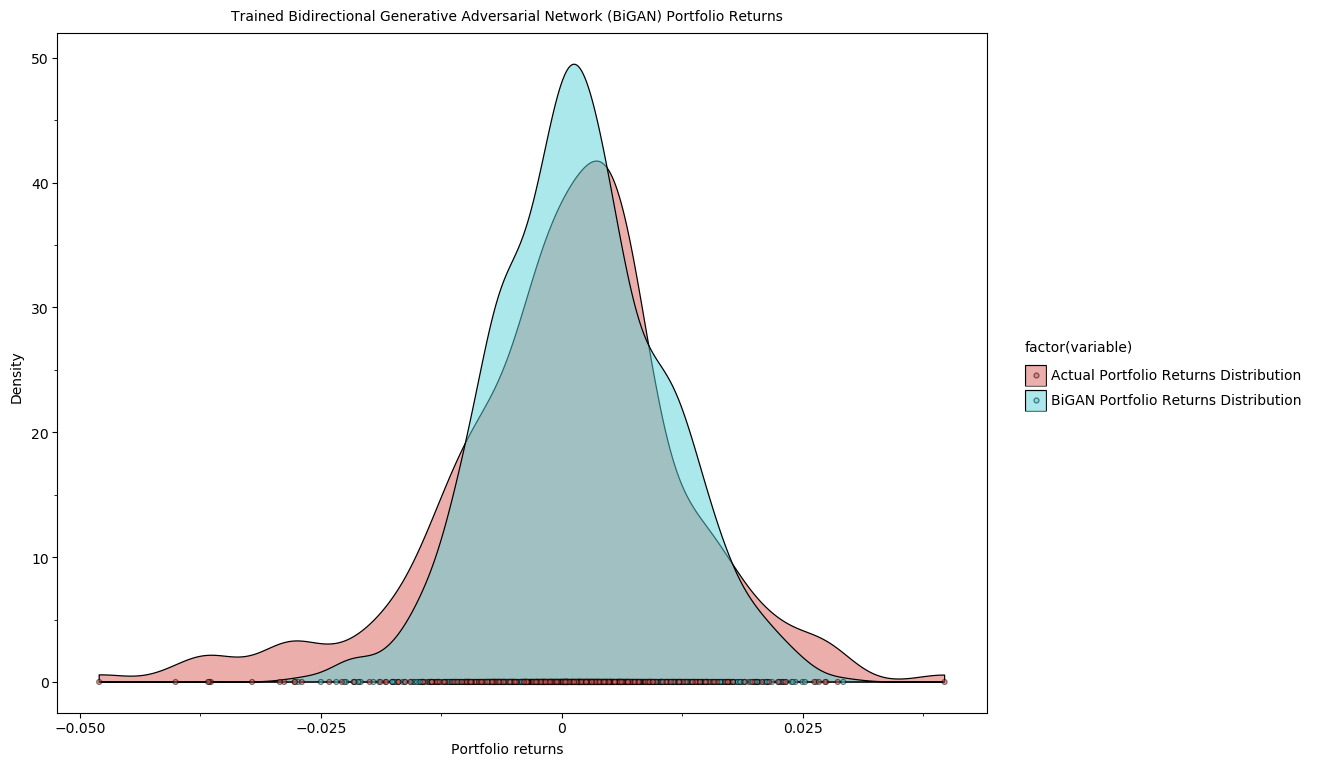

<ggplot: (8768551497698)>

In [212]:
num_sim = 1000
x_mean = np.zeros(shape=num_sim)
with tf.device(device_name="/CPU:0"):
    for i in range(num_sim):
        x_mean[i] = np.average(
            a=(
                generator(
                    z=np.array(
                        object=[
                            np.random.uniform(
                                low=-1.0, high=1.0, size=(num_encoding)
                            )
                        ]
                    )
                )[0]
                * std
            )
            + mean
        )

act_mean = np.zeros(shape=ret_data.shape[0])
for i in range(ret_data.shape[0]):
    act_mean[i] = np.average(a=(ret_data.iloc[i] * std) + mean)

from plotnine import *
from plotnine.data import *
plotnine.options.figure_size = (12, 9)
plot = (
    plotnine.ggplot(
        mapping=pd.melt(
            frame=pd.concat(
                objs=[
                    pd.DataFrame(
                        data=x_mean, columns=["BiGAN Portfolio Returns Distribution"]
                    ),
                    pd.DataFrame(
                        data=act_mean, columns=["Actual Portfolio Returns Distribution"]
                    ),
                ],
                axis=1,
            ).reset_index(drop=True)
        ).dropna(axis="index")
    )
    + plotnine.geom_density(
        mapping=plotnine.aes(
            x="value",
            fill="factor(variable)",
        ),
        alpha=0.5,
        color="black",
    )
    + plotnine.geom_point(
        mapping=plotnine.aes(x="value", y=0, fill="factor(variable)"),
        alpha=0.5,
        color="black",
    )
    + plotnine.xlab(xlab="Portfolio returns")
    + plotnine.ylab(ylab="Density")
    + plotnine.ggtitle(
        title="Trained Bidirectional Generative Adversarial Network (BiGAN) Portfolio Returns"
    )
    + plotnine.theme_matplotlib()
)
plot.save(filename="trained_bigan_sampler.png")
print(
    "The VaR at 1% estimate given by the BiGAN: {}%".format(
        100 * np.percentile(a=x_mean, axis=0, q=1)
    )
)
plot

/home/hamaad/.local/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 12 x 9 in image.
/home/hamaad/.local/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: untrained_bigan_sampler.png
/home/hamaad/.local/lib/python3.8/site-packages/plotnine/themes/theme.py:250: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
/home/hamaad/.local/lib/python3.8/site-packages/plotnine/themes/theme.py:250: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.


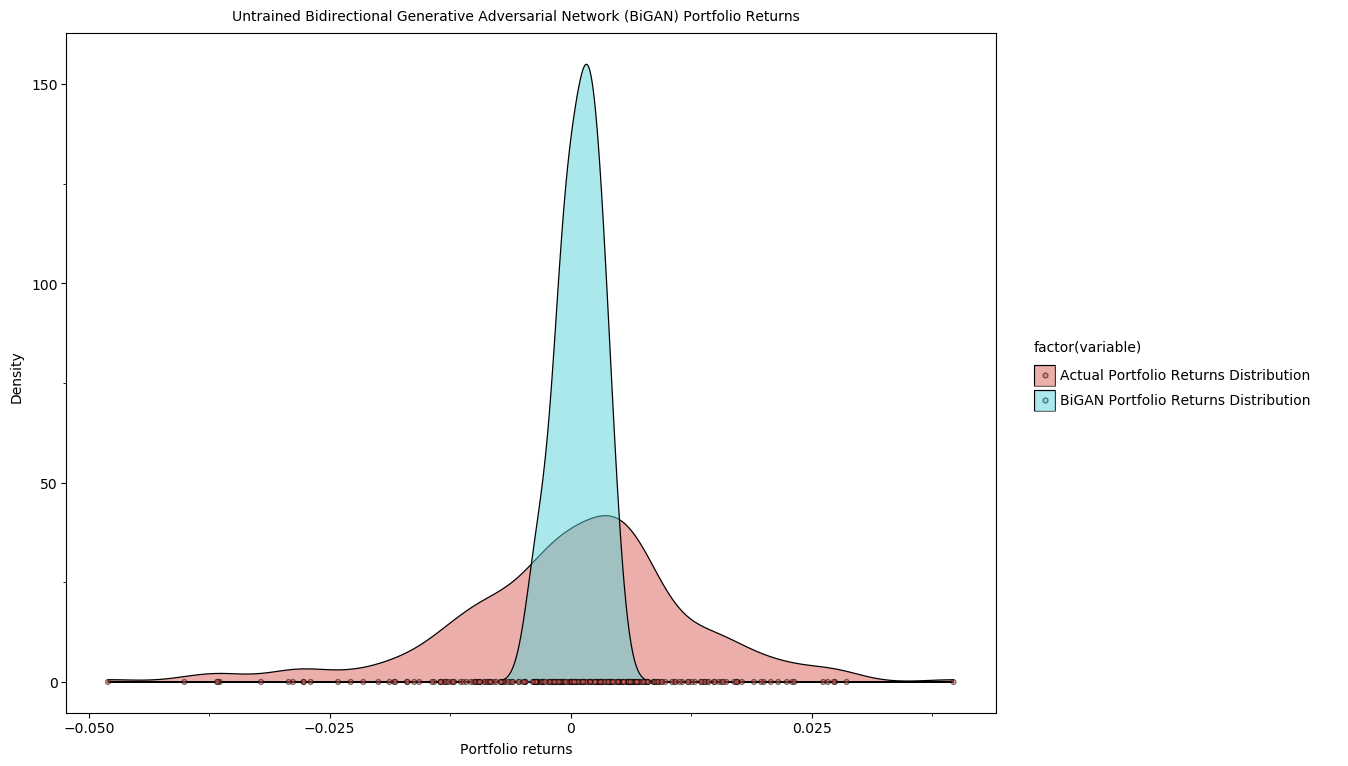

<ggplot: (8768551972810)>

In [176]:
untrained_generator = BidirectionalGenerativeAdversarialNetworkGenerator(
    num_hidden=num_hidden, num_inputs=num_inputs
)

untrained_x = np.zeros(shape=(num_sim, num_inputs))
untrained_x_mean = np.zeros(shape=num_sim)
for i, xi in enumerate(noise):
    untrained_x[i, :] = (untrained_generator(z=np.array([xi]))[0] * std) + mean
    untrained_x_mean[i] = np.average(a=untrained_x[i, :])

plotnine.options.figure_size = (12, 9)
plot = (
    plotnine.ggplot(
        mapping=pd.melt(
            frame=pd.concat(
                objs=[
                    pd.DataFrame(
                        data=untrained_x_mean,
                        columns=["BiGAN Portfolio Returns Distribution"],
                    ),
                    pd.DataFrame(
                        data=act_mean, columns=["Actual Portfolio Returns Distribution"]
                    ),
                ],
                axis=1,
            ).reset_index(drop=True)
        ).dropna(axis="index")
    )
    + plotnine.geom_density(
        mapping=plotnine.aes(x="value", fill="factor(variable)"),
        alpha=0.5,
        color="black",
    )
    + plotnine.geom_point(
        mapping=plotnine.aes(x="value", y=0, fill="factor(variable)"),
        alpha=0.5,
        color="black",
    )
    + plotnine.xlab(xlab="Portfolio returns")
    + plotnine.ylab(ylab="Density")
    + plotnine.ggtitle(
        title="Untrained Bidirectional Generative Adversarial Network (BiGAN) Portfolio Returns"
    )
    + plotnine.theme_matplotlib()
)
plot.save(filename="untrained_bigan_sampler.png")
plot

In [ ]:
2e-4

In [ ]:
# License
# Copyright 2018 Hamaad Musharaf Shah
# Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at
# http://www.apache.org/licenses/LICENSE-2.0
# Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

# BiGAN implementation inspired from here: https://github.com/eriklindernoren/Keras-GAN
# I believe I can re-write it slightly differently. On my to-do list.
class BiGAN(BaseEstimator, TransformerMixin):
    def __init__(self, z_size=None, iterations=None, batch_size=None):
        args, _, _, values = inspect.getargvalues(inspect.currentframe())
        values.pop("self")

        for arg, val in values.items():
            setattr(self, arg, val)

        # Build the discriminator.
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(
            optimizer=RMSprop(lr=0.0002, clipvalue=1.0, decay=1e-8),
            loss="binary_crossentropy",
            metrics=["accuracy"],
        )

        # Build the generator to fool the discriminator.
        # Freeze the discriminator here.
        self.discriminator.trainable = False
        self.generator = self.build_generator()
        self.encoder = self.build_encoder()

        noise = Input(shape=(self.z_size,))
        generated_data = self.generator(noise)
        fake = self.discriminator([noise, generated_data])

        real_data = Input(shape=(5,))
        encoding = self.encoder(real_data)
        valid = self.discriminator([encoding, real_data])

        # Set up and compile the combined model.
        # Trains generator to fool the discriminator.
        self.bigan_generator = Model([noise, real_data], [fake, valid])
        self.bigan_generator.compile(
            loss=["binary_crossentropy", "binary_crossentropy"],
            optimizer=RMSprop(lr=0.0004, clipvalue=1.0, decay=1e-8),
        )

    def fit(self, X, y=None):
        num_train = X.shape[0]
        start = 0

        # Adversarial ground truths.
        valid = np.ones((self.batch_size, 1))
        fake = np.zeros((self.batch_size, 1))

        for step in range(self.iterations):
            # Generate a new batch of noise...
            noise = np.random.uniform(
                low=-1.0, high=1.0, size=(self.batch_size, self.z_size)
            )
            # ...and generate a batch of synthetic returns data.
            generated_data = self.generator.predict(noise)

            # Get a batch of real returns data...
            stop = start + self.batch_size
            real_batch = X[start:stop]
            # ...and encode them.
            encoding = self.encoder.predict(real_batch)

            # Train the discriminator.
            d_loss_real = self.discriminator.train_on_batch(
                [encoding, real_batch], valid
            )
            d_loss_fake = self.discriminator.train_on_batch(
                [noise, generated_data], fake
            )
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # Train the generator.
            g_loss = self.bigan_generator.train_on_batch(
                [noise, real_batch], [valid, fake]
            )

            start += self.batch_size
            if start > num_train - self.batch_size:
                start = 0

            if step % 100 == 0:
                # Plot the progress.
                print(
                    "[Discriminator loss: %f, Discriminator accuracy: %.2f%%] [Generator loss: %f]"
                    % (d_loss[0], 100 * d_loss[1], g_loss[0])
                )

        return self

    def transform(self, X):
        return self.feature_extractor.predict(X)

    def build_encoder(self):
        encoder_input = Input(shape=(5,))

        encoder_model = Dense(units=100)(encoder_input)
        encoder_model = LeakyReLU(alpha=0.2)(encoder_model)
        encoder_model = BatchNormalization()(encoder_model)
        encoder_model = Dense(units=100)(encoder_model)
        encoder_model = LeakyReLU(alpha=0.2)(encoder_model)

        encoder_output = Dense(units=self.z_size, activation="tanh")(encoder_model)

        self.feature_extractor = Model(encoder_input, encoder_output)

        return Model(encoder_input, encoder_output)

    def build_generator(self):
        # We will map z, a latent vector, to continuous returns data space (..., 5).
        latent = Input(shape=(self.z_size,))

        # This produces a (..., 100) shaped tensor.
        generator_model = Dense(units=100, activation="elu")(latent)
        generator_model = BatchNormalization()(generator_model)
        generator_model = Dense(units=100, activation="elu")(generator_model)
        generator_model = BatchNormalization()(generator_model)

        generator_output = Dense(units=5, activation="linear")(generator_model)

        return Model(latent, generator_output)

    def build_discriminator(self):
        z = Input(shape=(self.z_size,))
        ret_data = Input(shape=(5,))
        discriminator_inputs = concatenate([z, ret_data], axis=1)

        discriminator_model = Dense(units=100)(discriminator_inputs)
        discriminator_model = LeakyReLU(alpha=0.2)(discriminator_model)
        discriminator_model = Dropout(rate=0.5)(discriminator_model)

        discriminator_output = Dense(units=1, activation="sigmoid")(discriminator_model)

        return Model([z, ret_data], discriminator_output)


z_size = 10
bigan = BiGAN(z_size=z_size, batch_size=100, iterations=10000)

bigan.fit(X=ret_data)

n_sim = 1000
noise = np.random.uniform(low=-1.0, high=1.0, size=(n_sim, z_size))
x = np.zeros(shape=(n_sim, 5))
x_mean = np.zeros(shape=n_sim)
for i, xi in enumerate(noise):
    x[i, :] = (bigan.generator.predict(x=np.array([xi]))[0] * std) + mean
    x_mean[i] = np.average(a=x[i, :])

act_mean = np.zeros(shape=ret_data.shape[0])
for i in range(ret_data.shape[0]):
    act_mean[i] = np.average(a=(ret_data.iloc[i] * std) + mean)

plotnine.options.figure_size = (12, 9)
plot = (
    ggplot(
        pd.melt(
            pd.concat(
                [
                    pd.DataFrame(
                        x_mean, columns=["BiGAN Portfolio Returns Distribution"]
                    ).reset_index(drop=True),
                    pd.DataFrame(
                        act_mean, columns=["Actual Portfolio Returns Distribution"]
                    ).reset_index(drop=True),
                ],
                axis=1,
            )
        )
    )
    + geom_density(aes(x="value", fill="factor(variable)"), alpha=0.5, color="black")
    + geom_point(aes(x="value", y=0, fill="factor(variable)"), alpha=0.5, color="black")
    + xlab("Portfolio returns")
    + ylab("Density")
    + ggtitle(
        "Trained Bidirectional Generative Adversarial Network (BiGAN) Portfolio Returns"
    )
    + theme_matplotlib()
)
plot.save(filename="trained_bigan_sampler.png")

untrained_bigan = BiGAN(z_size=z_size, batch_size=100, iterations=10000)

untrained_x = np.zeros(shape=(n_sim, 5))
untrained_x_mean = np.zeros(shape=n_sim)
for i, xi in enumerate(noise):
    untrained_x[i, :] = (
        untrained_bigan.generator.predict(x=np.array([xi]))[0] * std
    ) + mean
    untrained_x_mean[i] = np.average(a=untrained_x[i, :])

plotnine.options.figure_size = (12, 9)
plot = (
    ggplot(
        pd.melt(
            pd.concat(
                [
                    pd.DataFrame(
                        untrained_x_mean,
                        columns=["BiGAN Portfolio Returns Distribution"],
                    ).reset_index(drop=True),
                    pd.DataFrame(
                        act_mean, columns=["Actual Portfolio Returns Distribution"]
                    ).reset_index(drop=True),
                ],
                axis=1,
            )
        )
    )
    + geom_density(aes(x="value", fill="factor(variable)"), alpha=0.5, color="black")
    + geom_point(aes(x="value", y=0, fill="factor(variable)"), alpha=0.5, color="black")
    + xlab("Portfolio returns")
    + ylab("Density")
    + ggtitle(
        "Untrained Bidirectional Generative Adversarial Network (BiGAN) Portfolio Returns"
    )
    + theme_matplotlib()
)
plot.save(filename="untrained_bigan_sampler.png")

print(
    "The VaR at 1%% estimate given by the BiGAN: %.2f%%"
    % (100 * np.percentile(a=x_mean, axis=0, q=1))
)

## Conclusion

Before we conclude the article let's have a look at the portfolio returns distribution sampled from an untrained BiGAN. 

![](untrained_bigan_sampler.png)

It is clear from the above graph that the untrained BiGAN's sampled portfolio returns distribution is remarkably different from the actual portfolio returns distribution. This is, as we can imagine, to be expected.

Contrast this with a trained BiGAN: The following graph will clearly show the value of GAN type models for market risk management as we have arrived at this learnt portfolio returns distribution without having to rely on a possibly incorrect assumption with regards to the actual portfolio returns distribution such as a multidimensional Gaussian distribution.

Note that we perhaps should use an evolutionary algorithm or a reinforcement learner to automatically learn the appropriate GAN or BiGAN architecture: Perhaps that shall be a topic for a future article.

![](trained_bigan_sampler.png)

Finally we update the VaR estimate table for using different market risk management methods as below. We can see that the VaR estimate provided by the BiGAN is similar, if not exactly the same, to the ones provided by the other market risk management methods. This provides us with a good sanity check with regards to using the BiGAN for market risk management in that it provides competitive results with respect to well established existing market risk management methods.

| VaR Method    | 1% VaR | 
| :------------- |-------------:|
| Variance-covariance | -2.87% | 
| Historical simulation | -3.65%  |
| Monte Carlo simulation | -2.63%  |
| Bidirectional Generative Adversarial Network | -4.42%  |

The portfolio of 5 stocks we had to work with was not particularly complicated compared to potentially having portfolios where we might have derivatives or other portfolio components. Arriving at the correct portfolio returns distribution of a potentially complicated portfolio is a problem that has been shown can be solved via deep learning specifically the BiGAN. This result can be useful for market risk management and any other different problem space where we need to generate samples from a potentially complex, and perhaps unknown, distribution. 

There will potentially be a follow up article of mine where we look at a complicated backtesting scenario, i.e., validating that market risk management VaR type estimates provided by BiGAN is appropriate for future portfolio returns distributions that we have not seen, and perhaps using more complicated portfolios. The aim of this article of mine was to clearly show that a trained BiGAN can be used for market risk management VaR estimation for a given portfolio.

## References

1. Goodfellow, I., Bengio, Y. and Courville A. (2016). Deep Learning (MIT Press).
2. Geron, A. (2017). Hands-On Machine Learning with Scikit-Learn & Tensorflow (O'Reilly).
3. Kingma, D. P., and Welling M. (2014). Auto-Encoding Variational Bayes (https://arxiv.org/abs/1312.6114).
4. http://scikit-learn.org/stable/#
5. https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1
6. https://stackoverflow.com/questions/42177658/how-to-switch-backend-with-keras-from-tensorflow-to-theano
7. https://blog.keras.io/building-autoencoders-in-keras.html
8. https://keras.io
9. Chollet, F. (2018). Deep Learning with Python (Manning).
10. Hull, John C. (2010). Risk Management and Financial Institutions (Pearson).
11. https://towardsdatascience.com/automatic-feature-engineering-using-deep-learning-and-bayesian-inference-application-to-computer-7b2bb8dc7351
12. https://towardsdatascience.com/automatic-feature-engineering-using-generative-adversarial-networks-8e24b3c16bf3
13. Donahue, J., Krähenbühl, P. and Darrell, T. (2017). Adversarial Feature Learning (https://arxiv.org/pdf/1605.09782).
14. https://github.com/eriklindernoren/Keras-GAN